## IMDB Score prediction for movies

In [1]:
#Import libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

**2. Data Preprocessing**

The dataset under consideration contains information about various movies. It encompasses details such as directors, cast members (actors), critic reviews, audience reactions, and other related attributes. Among the crucial metrics used to gauge a movie's success, the IMDb score holds a prominent position. The IMDb score is a numerical representation of how well-received a movie is among the general audience and critics alike. It reflects the average rating given by viewers and provides insights into a movie's popularity and quality.

In [2]:
#Reading the Data 

movie_IMDB_df=pd.read_csv("movie_metadata.csv")

In [3]:
movie_IMDB_df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [4]:
 movie_IMDB_df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [5]:
movie_IMDB_df.shape

(5043, 28)

In [6]:
#Summary statistics for numerical columns, represented by five key points 

movie_IMDB_df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


In [7]:
#Removing the color section as most of the movies is colored

movie_IMDB_df["color"].value_counts()

movie_IMDB_df.drop('color',axis=1,inplace=True)

In [8]:
#Dropping the Imdb link from the dataset

movie_IMDB_df.drop('movie_imdb_link', axis=1, inplace=True)

In [9]:
#Checking for the columns present in the datset

movie_IMDB_df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [10]:
#Checking No of the missing values in the dataset

movie_IMDB_df.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [11]:
#Eliminate dataset null values with low counts to retain more data effectively

movie_IMDB_df.dropna(axis=0,subset=['director_name', 'num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_2_name','actor_1_facebook_likes','actor_1_name','actor_3_name','facenumber_in_poster','num_user_for_reviews','language','country','actor_2_facebook_likes','plot_keywords'],inplace=True)

In [12]:
movie_IMDB_df.shape

(4737, 26)

In [13]:
#Replacing the content rating with Value R as it has highest frequency

movie_IMDB_df["content_rating"].fillna("R", inplace = True) 

In [14]:
#Replacing the aspect_ratio with the median of the value as the graph is right skewed 

movie_IMDB_df["aspect_ratio"].fillna(movie_IMDB_df["aspect_ratio"].median(),inplace=True)

In [15]:
#Replace the value in budget with the median of the value

movie_IMDB_df["budget"].fillna(movie_IMDB_df["budget"].median(),inplace=True)


In [16]:
#Replace the value in gross with the median of the value 

movie_IMDB_df['gross'].fillna(movie_IMDB_df['gross'].median(),inplace=True)

In [17]:
# Recheck that all the null values are removed

movie_IMDB_df.isna().sum()



director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [18]:
#Removing the duplicate values in the dataset

movie_IMDB_df.drop_duplicates(inplace=True)
movie_IMDB_df.shape

(4695, 26)

In [19]:
#Count of the language values 

movie_IMDB_df["language"].value_counts()

English       4405
French          69
Spanish         35
Hindi           25
Mandarin        24
German          18
Japanese        16
Russian         11
Cantonese       10
Italian         10
Portuguese       8
Korean           8
Danish           5
Hebrew           4
Persian          4
Norwegian        4
Swedish          4
Dutch            4
Thai             3
Arabic           3
Dari             2
Aboriginal       2
Indonesian       2
None             2
Zulu             2
Czech            1
Romanian         1
Vietnamese       1
Dzongkha         1
Polish           1
Maya             1
Filipino         1
Icelandic        1
Kazakh           1
Hungarian        1
Bosnian          1
Telugu           1
Aramaic          1
Mongolian        1
Greek            1
Name: language, dtype: int64

In [20]:
#Most of the values for the languages is english therefore drop the english column

movie_IMDB_df.drop('language',axis=1,inplace=True)

In [21]:
#Creating a new column to check the net profit made by the company  

movie_IMDB_df["Profit"]=movie_IMDB_df['budget'].sub(movie_IMDB_df['gross'], axis = 0) 

movie_IMDB_df.head(5)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,-523505847.0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,-9404152.0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,44925825.0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,-198130642.0
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,190641321.0


In [22]:
#Creating a new column to check the profit percentage made by the company 

movie_IMDB_df['Profit_Percentage']=(movie_IMDB_df["Profit"]/movie_IMDB_df["gross"])*100
movie_IMDB_df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,-523505847.0,-68.836532
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,-9404152.0,-3.039439
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,44925825.0,22.454585
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,-198130642.0,-44.212697
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,190641321.0,260.942743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,Ian Gamazon,...,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,2.35,74,-63071.0,-90.010133
5035,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,...,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,-2033920.0,-99.657017
5037,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,Kerry Bishé,...,USA,Not Rated,9000.0,2011.0,205.0,6.4,2.35,413,4416.0,96.335079
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,26005908.0,Comedy|Drama,Eric Mabius,...,Canada,R,20000000.0,2013.0,470.0,7.7,2.35,84,-6005908.0,-23.094398


In [23]:
#Value counts for the countries 

value_counts=movie_IMDB_df["country"].value_counts()
print(value_counts)

USA               3568
UK                 420
France             149
Canada             107
Germany             96
Australia           53
Spain               32
India               27
China               24
Japan               21
Italy               20
Hong Kong           16
New Zealand         14
South Korea         12
Russia              11
Ireland             11
Mexico              11
Denmark             11
South Africa         8
Brazil               8
Norway               7
Sweden               5
Netherlands          5
Thailand             4
Iran                 4
Argentina            4
Israel               3
West Germany         3
Switzerland          3
Belgium              3
Czech Republic       3
Romania              2
Taiwan               2
Poland               2
Iceland              2
Hungary              2
Greece               2
Official site        1
Cambodia             1
Afghanistan          1
Indonesia            1
Kyrgyzstan           1
Colombia             1
New Line   

In [24]:
#Getting top 2 values of index

vals = value_counts[:2].index
print (vals)
movie_IMDB_df['country'] = movie_IMDB_df.country.where(movie_IMDB_df.country.isin(vals), 'other')


Index(['USA', 'UK'], dtype='object')


In [25]:
#Divided the country into three catogories 
movie_IMDB_df["country"].value_counts()

USA      3568
other     707
UK        420
Name: country, dtype: int64

In [26]:
movie_IMDB_df.head(10)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,-523505847.0,-68.836532
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,-9404152.0,-3.039439
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,44925825.0,22.454585
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,-198130642.0,-44.212697
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,190641321.0,260.942743
6,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,...,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,-78530303.0,-23.335284
7,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,...,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000,59192738.0,29.477389
8,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,...,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000,-208991599.0,-45.532772
9,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,...,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000,-51956980.0,-17.206749
10,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,Henry Cavill,...,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000,-80249062.0,-24.299558


**3. Data Visualization**

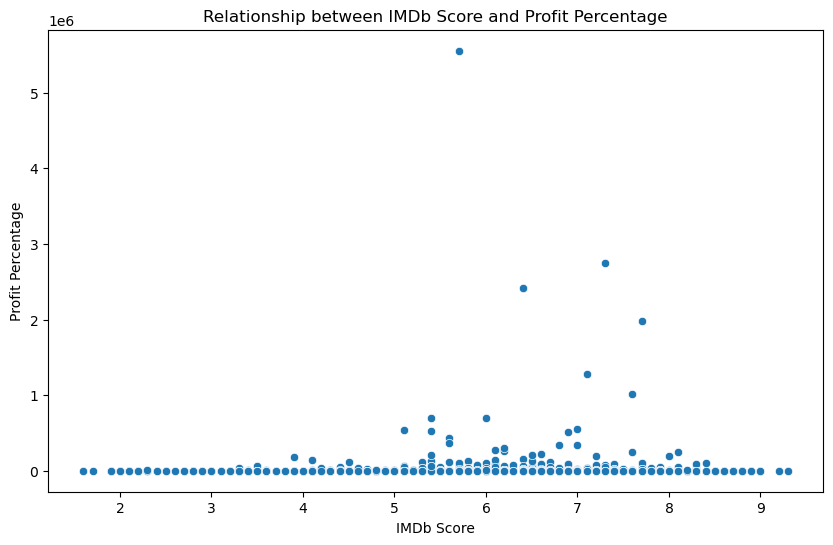

In [27]:
# Assuming 'Profit_Percentage' is a calculated column in your movie_df
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movie_IMDB_df, x='imdb_score', y='Profit_Percentage')
plt.title('Relationship between IMDb Score and Profit Percentage')
plt.xlabel('IMDb Score')
plt.ylabel('Profit Percentage')
plt.show()

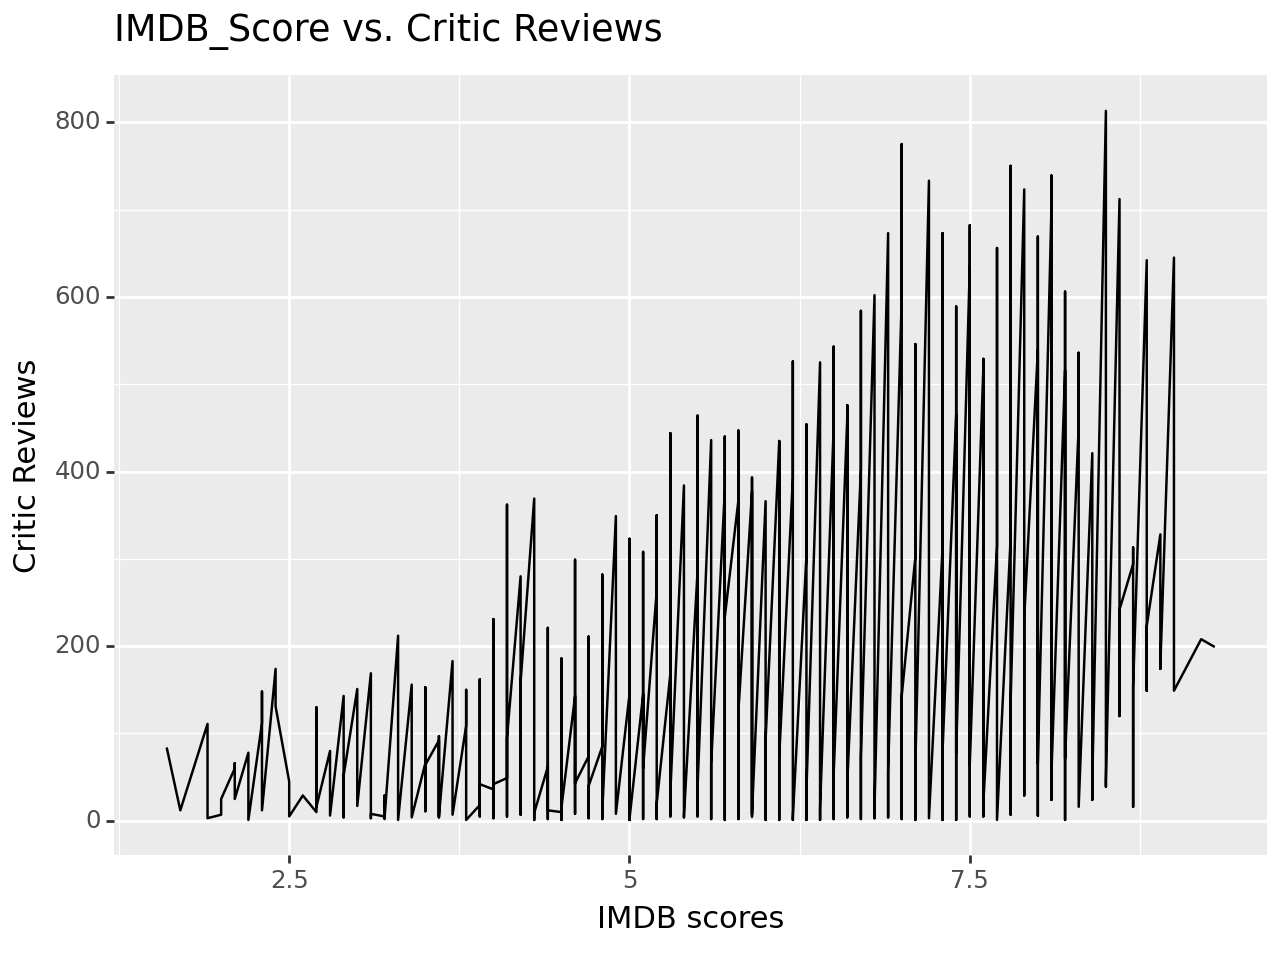

<Figure Size: (640 x 480)>

In [28]:
#Finding the corelation between imdb_rating with respect to Critic Reviews 

(ggplot(movie_IMDB_df)
 + aes(x='imdb_score', y='num_critic_for_reviews')
 + geom_line()
 + labs(title='IMDB_Score vs. Critic Reviews', x='IMDB scores', y='Critic Reviews')
)

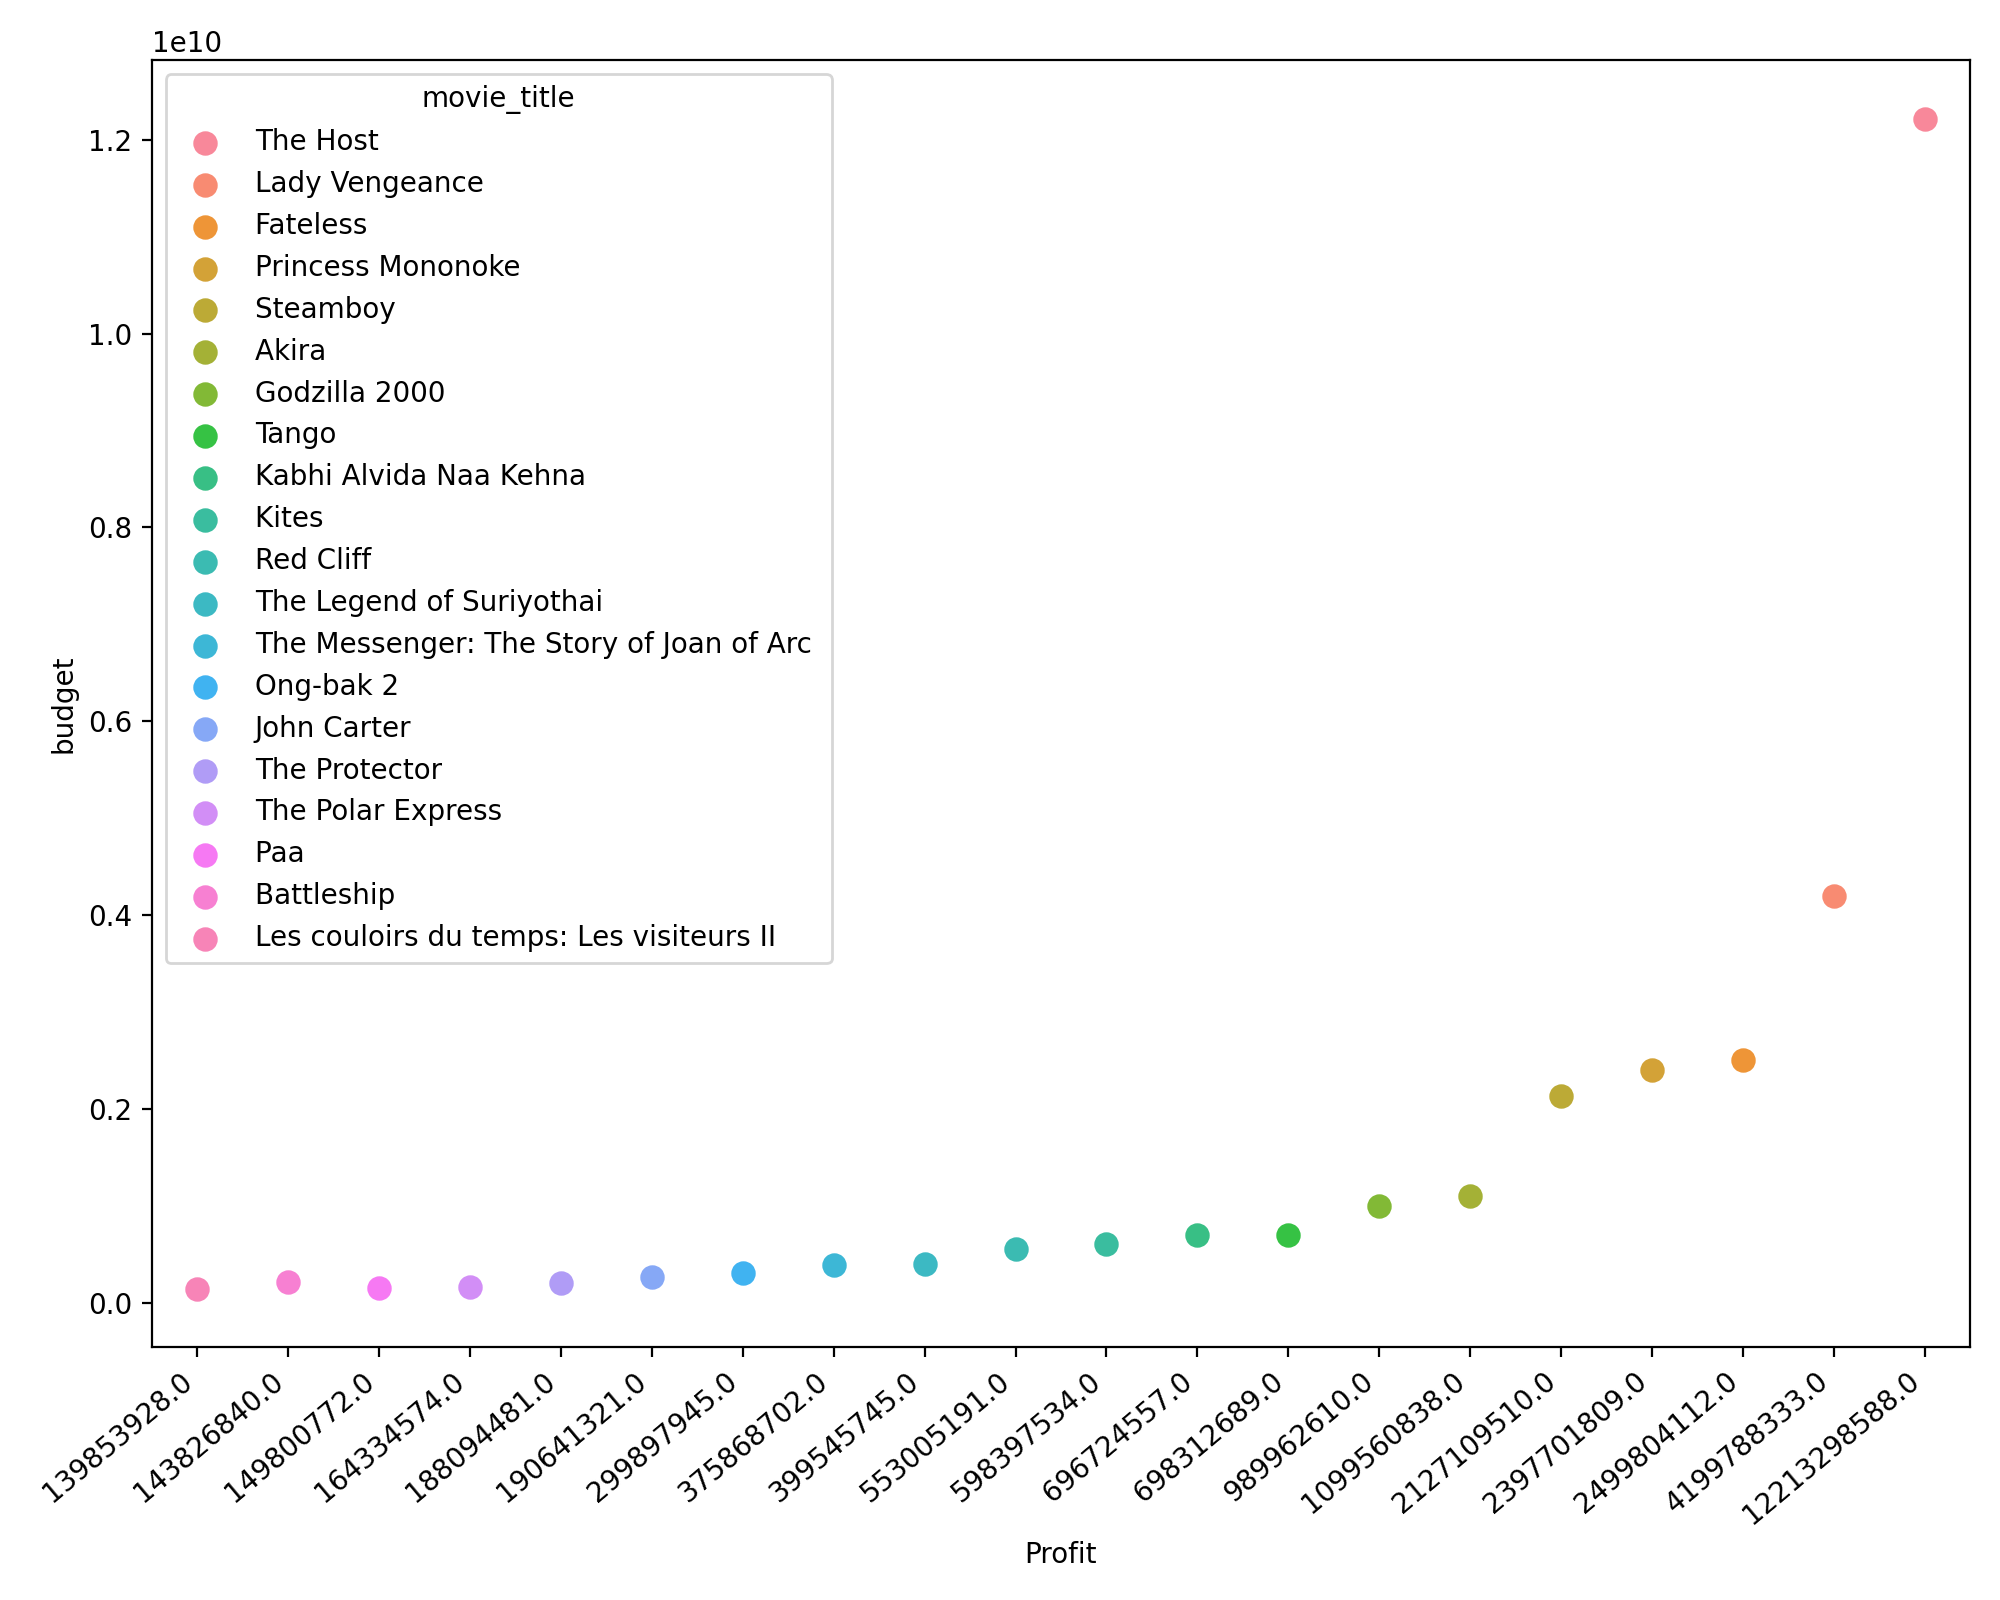

In [29]:
#Top 20 movies based on the profit they made

plt.figure(figsize=(10, 8))
movie_IMDB_df = movie_IMDB_df.sort_values(by='Profit', ascending=False)
movie_IMDB_df_new = movie_IMDB_df.head(20)
ax = sns.pointplot(data=movie_IMDB_df_new, x='Profit', y='budget', hue='movie_title')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

**Movie with high IMDB rating have most no of facebook likes**

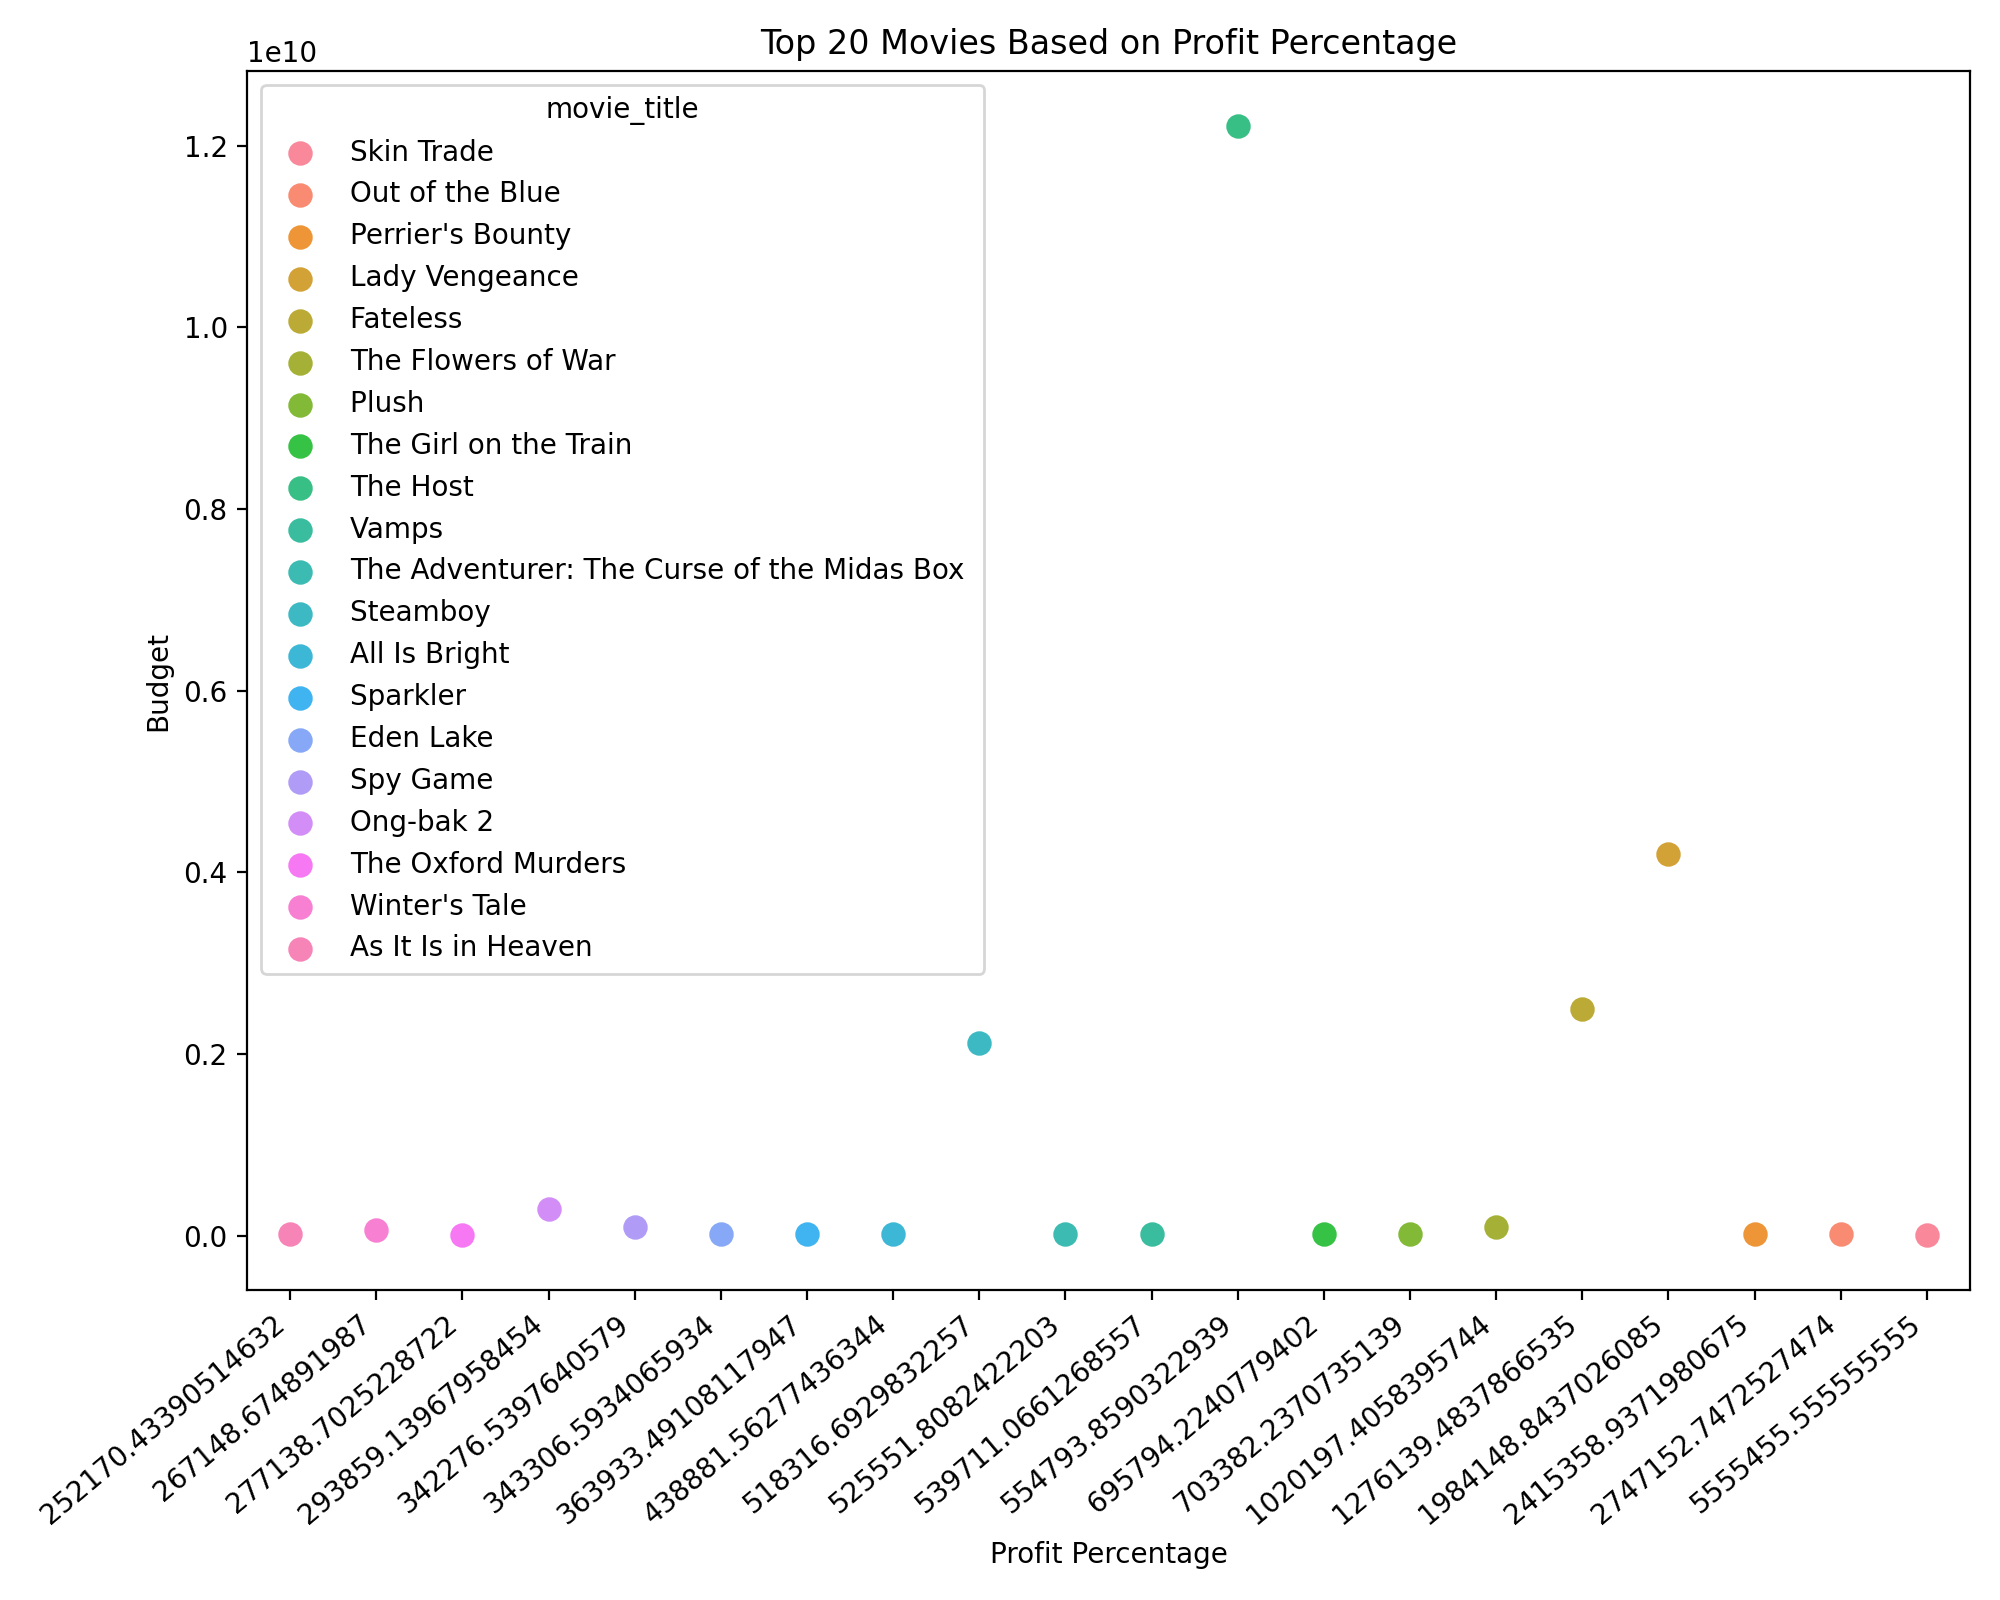

In [30]:
#Top 20 movies based on the profit percentage they made

plt.figure(figsize=(10, 8))
movie_IMDB_df = movie_IMDB_df.sort_values(by='Profit_Percentage', ascending=False)
movie_IMDB_df_new = movie_IMDB_df.head(20)
ax = sns.pointplot(data=movie_IMDB_df_new, x='Profit_Percentage', y='budget', hue='movie_title')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Profit Percentage')
plt.ylabel('Budget')
plt.title('Top 20 Movies Based on Profit Percentage')
plt.tight_layout()
plt.show()


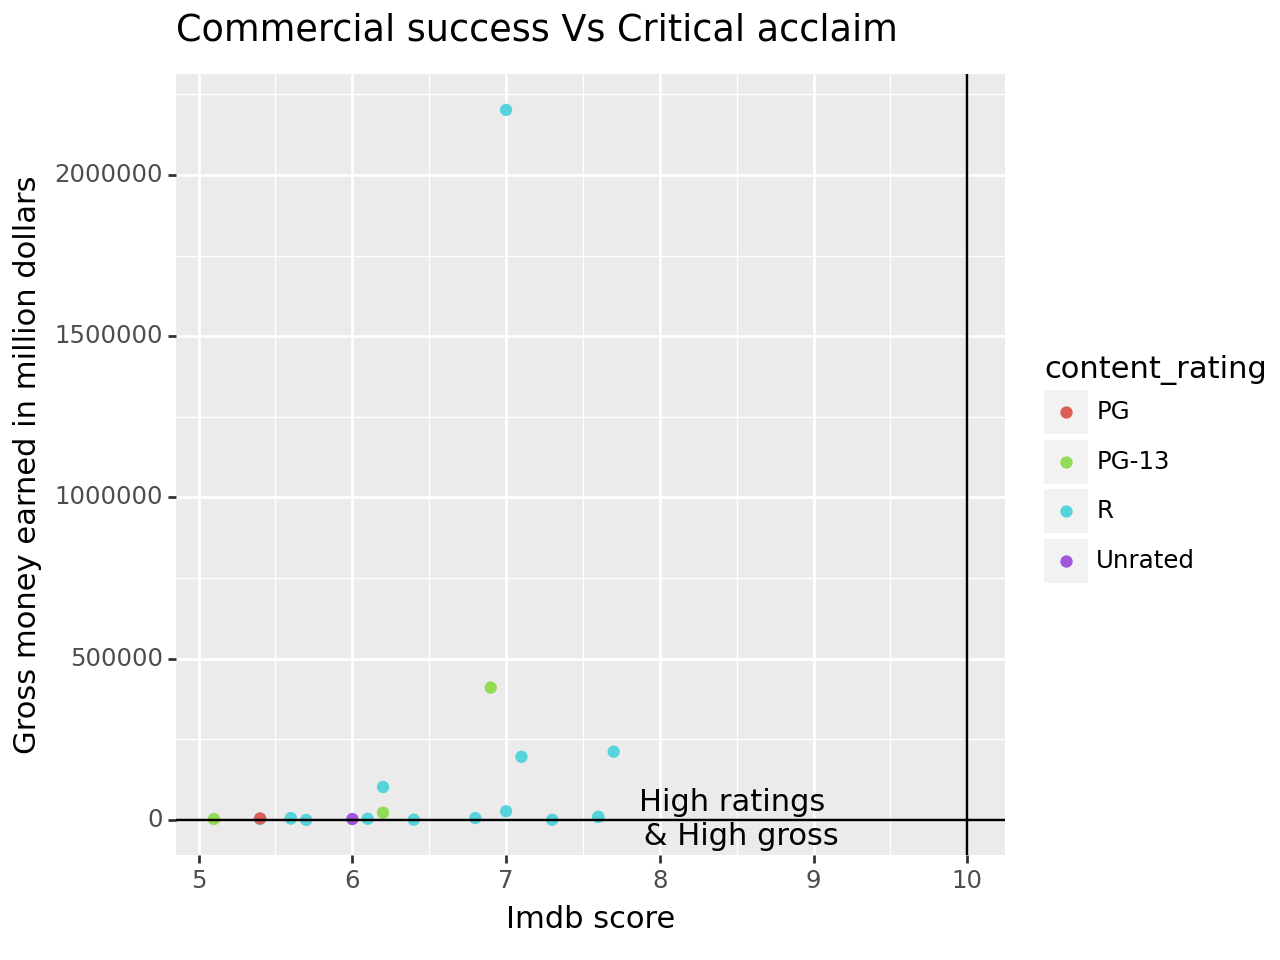

<Figure Size: (640 x 480)>

In [31]:
#Commercial success vs critial acclaim

movie_IMDB_df= movie_IMDB_df.sort_values(by ='Profit_Percentage' , ascending=False)
movie_IMDB_df_new=movie_IMDB_df.head(20)
(ggplot(movie_IMDB_df_new)
 + aes(x='imdb_score', y='gross',color = "content_rating")
 + geom_point()
 +  geom_hline(aes(yintercept = 600)) + 
  geom_vline(aes(xintercept = 10)) + 
  xlab("Imdb score") + 
  ylab("Gross money earned in million dollars") + 
  ggtitle("Commercial success Vs Critical acclaim") +
  annotate("text", x = 8.5, y = 700, label = "High ratings \n & High gross"))

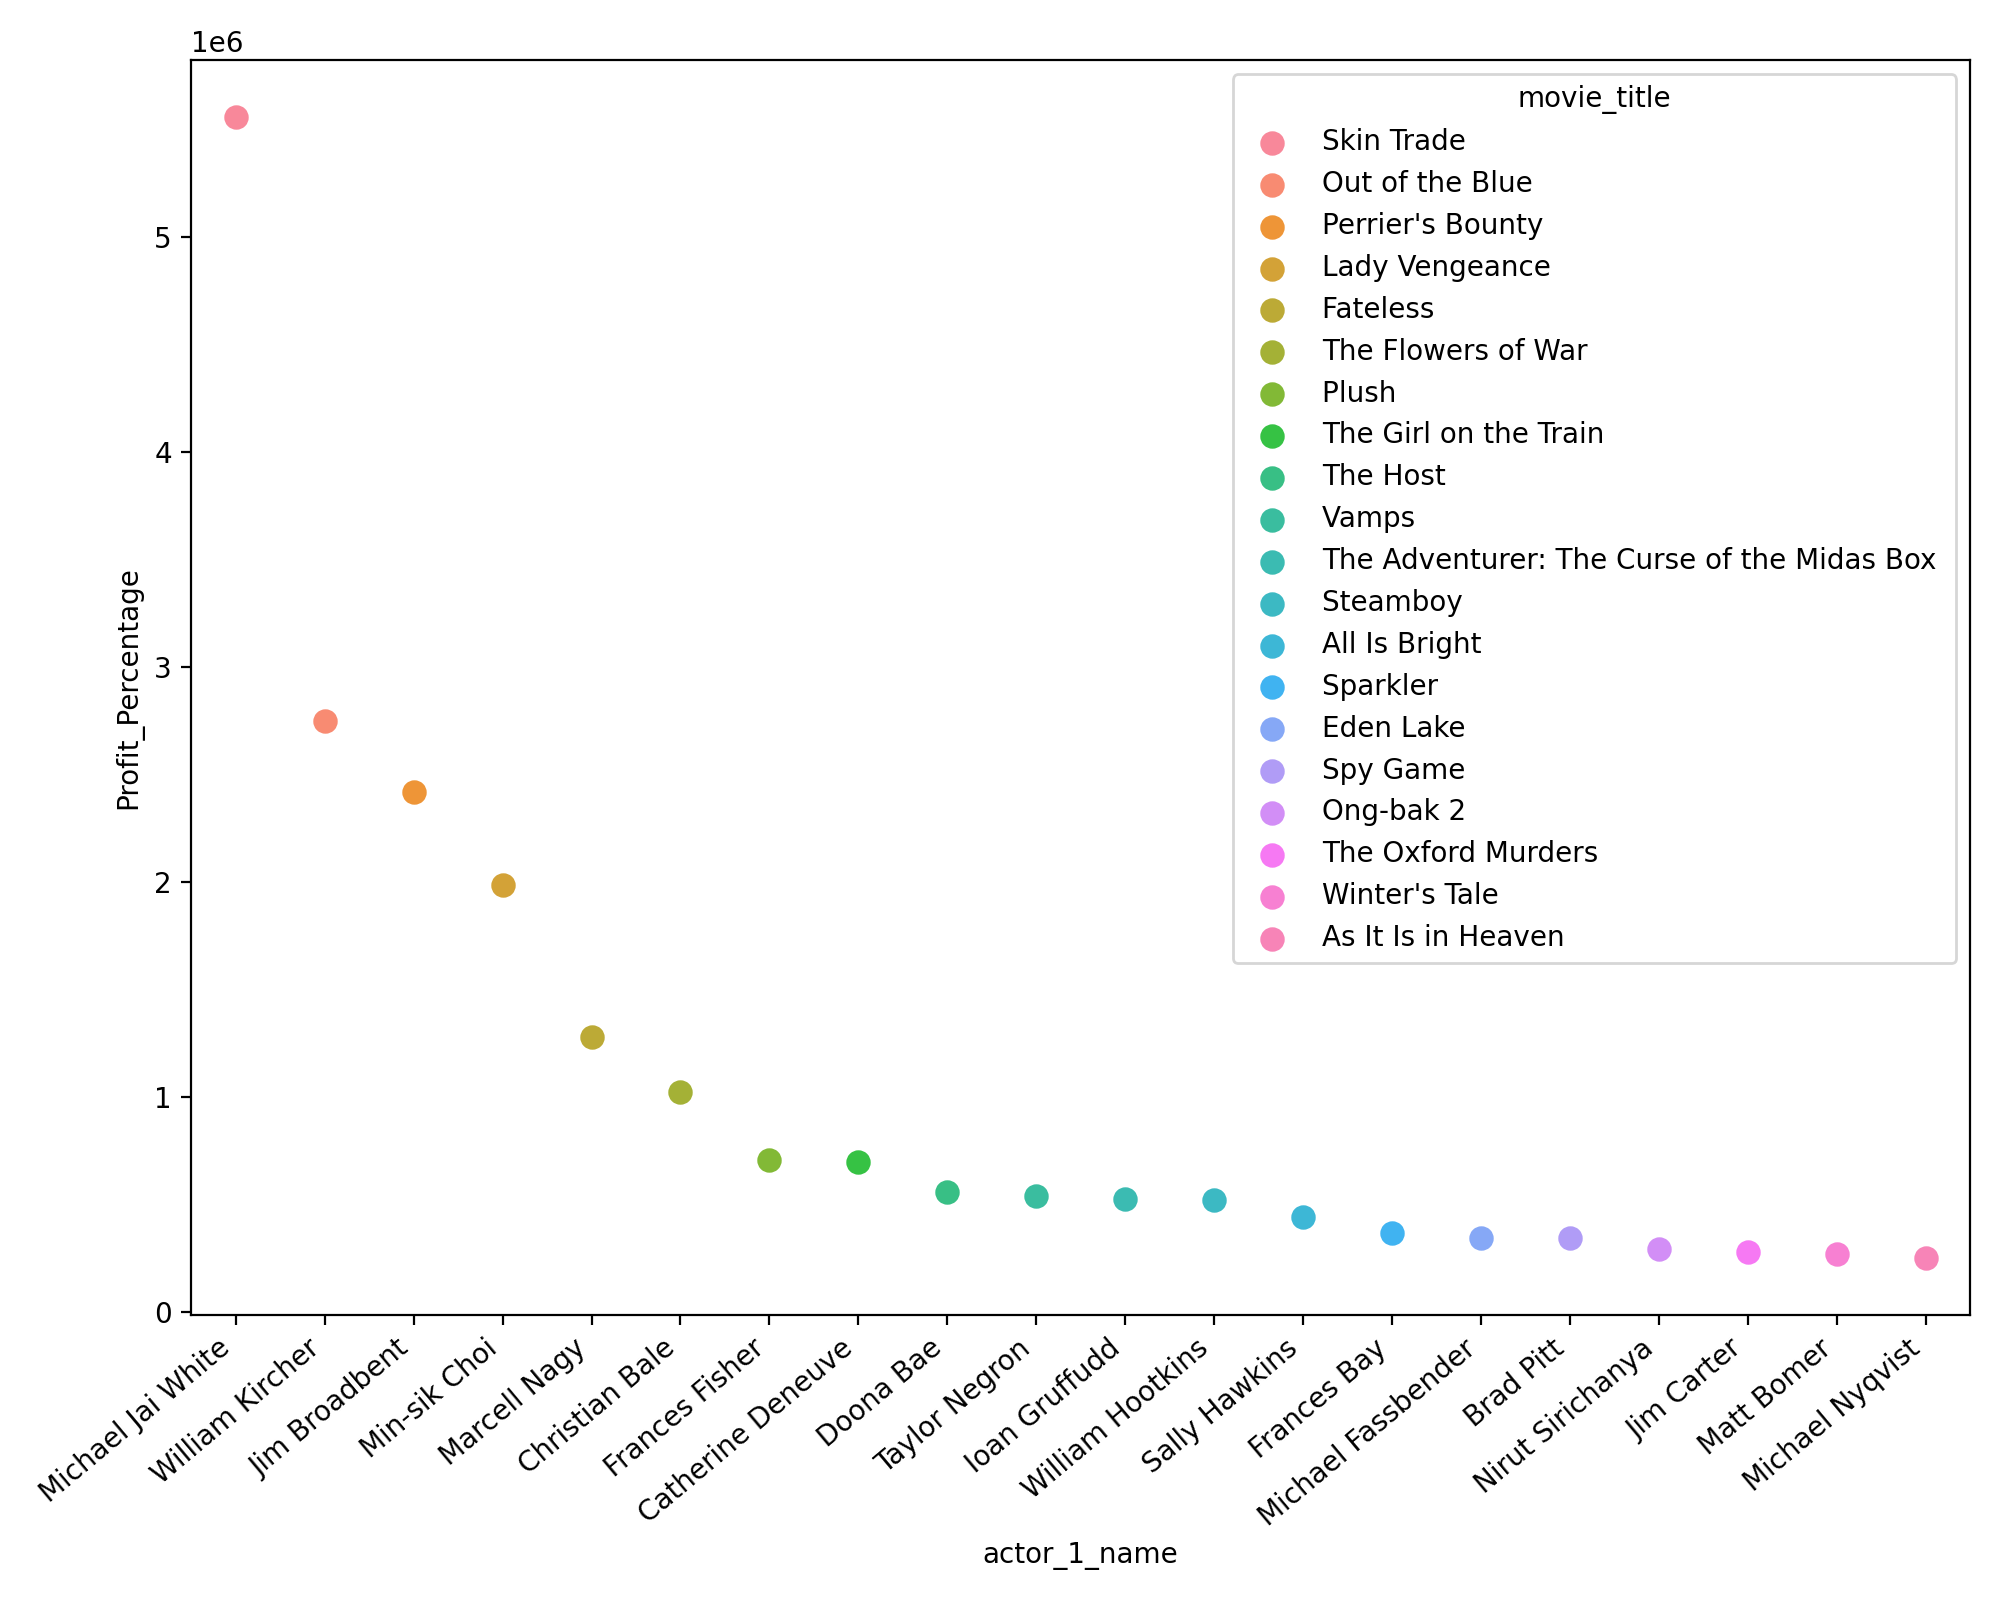

In [32]:
#Top 20 actors of movies based on the commerical success

plt.figure(figsize=(10, 8))
movie_IMDB_df = movie_IMDB_df.sort_values(by='Profit_Percentage', ascending=False)
movie_IMDB_df_new = movie_IMDB_df.head(20)
ax = sns.pointplot(x='actor_1_name', y='Profit_Percentage', data=movie_IMDB_df_new, hue='movie_title')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


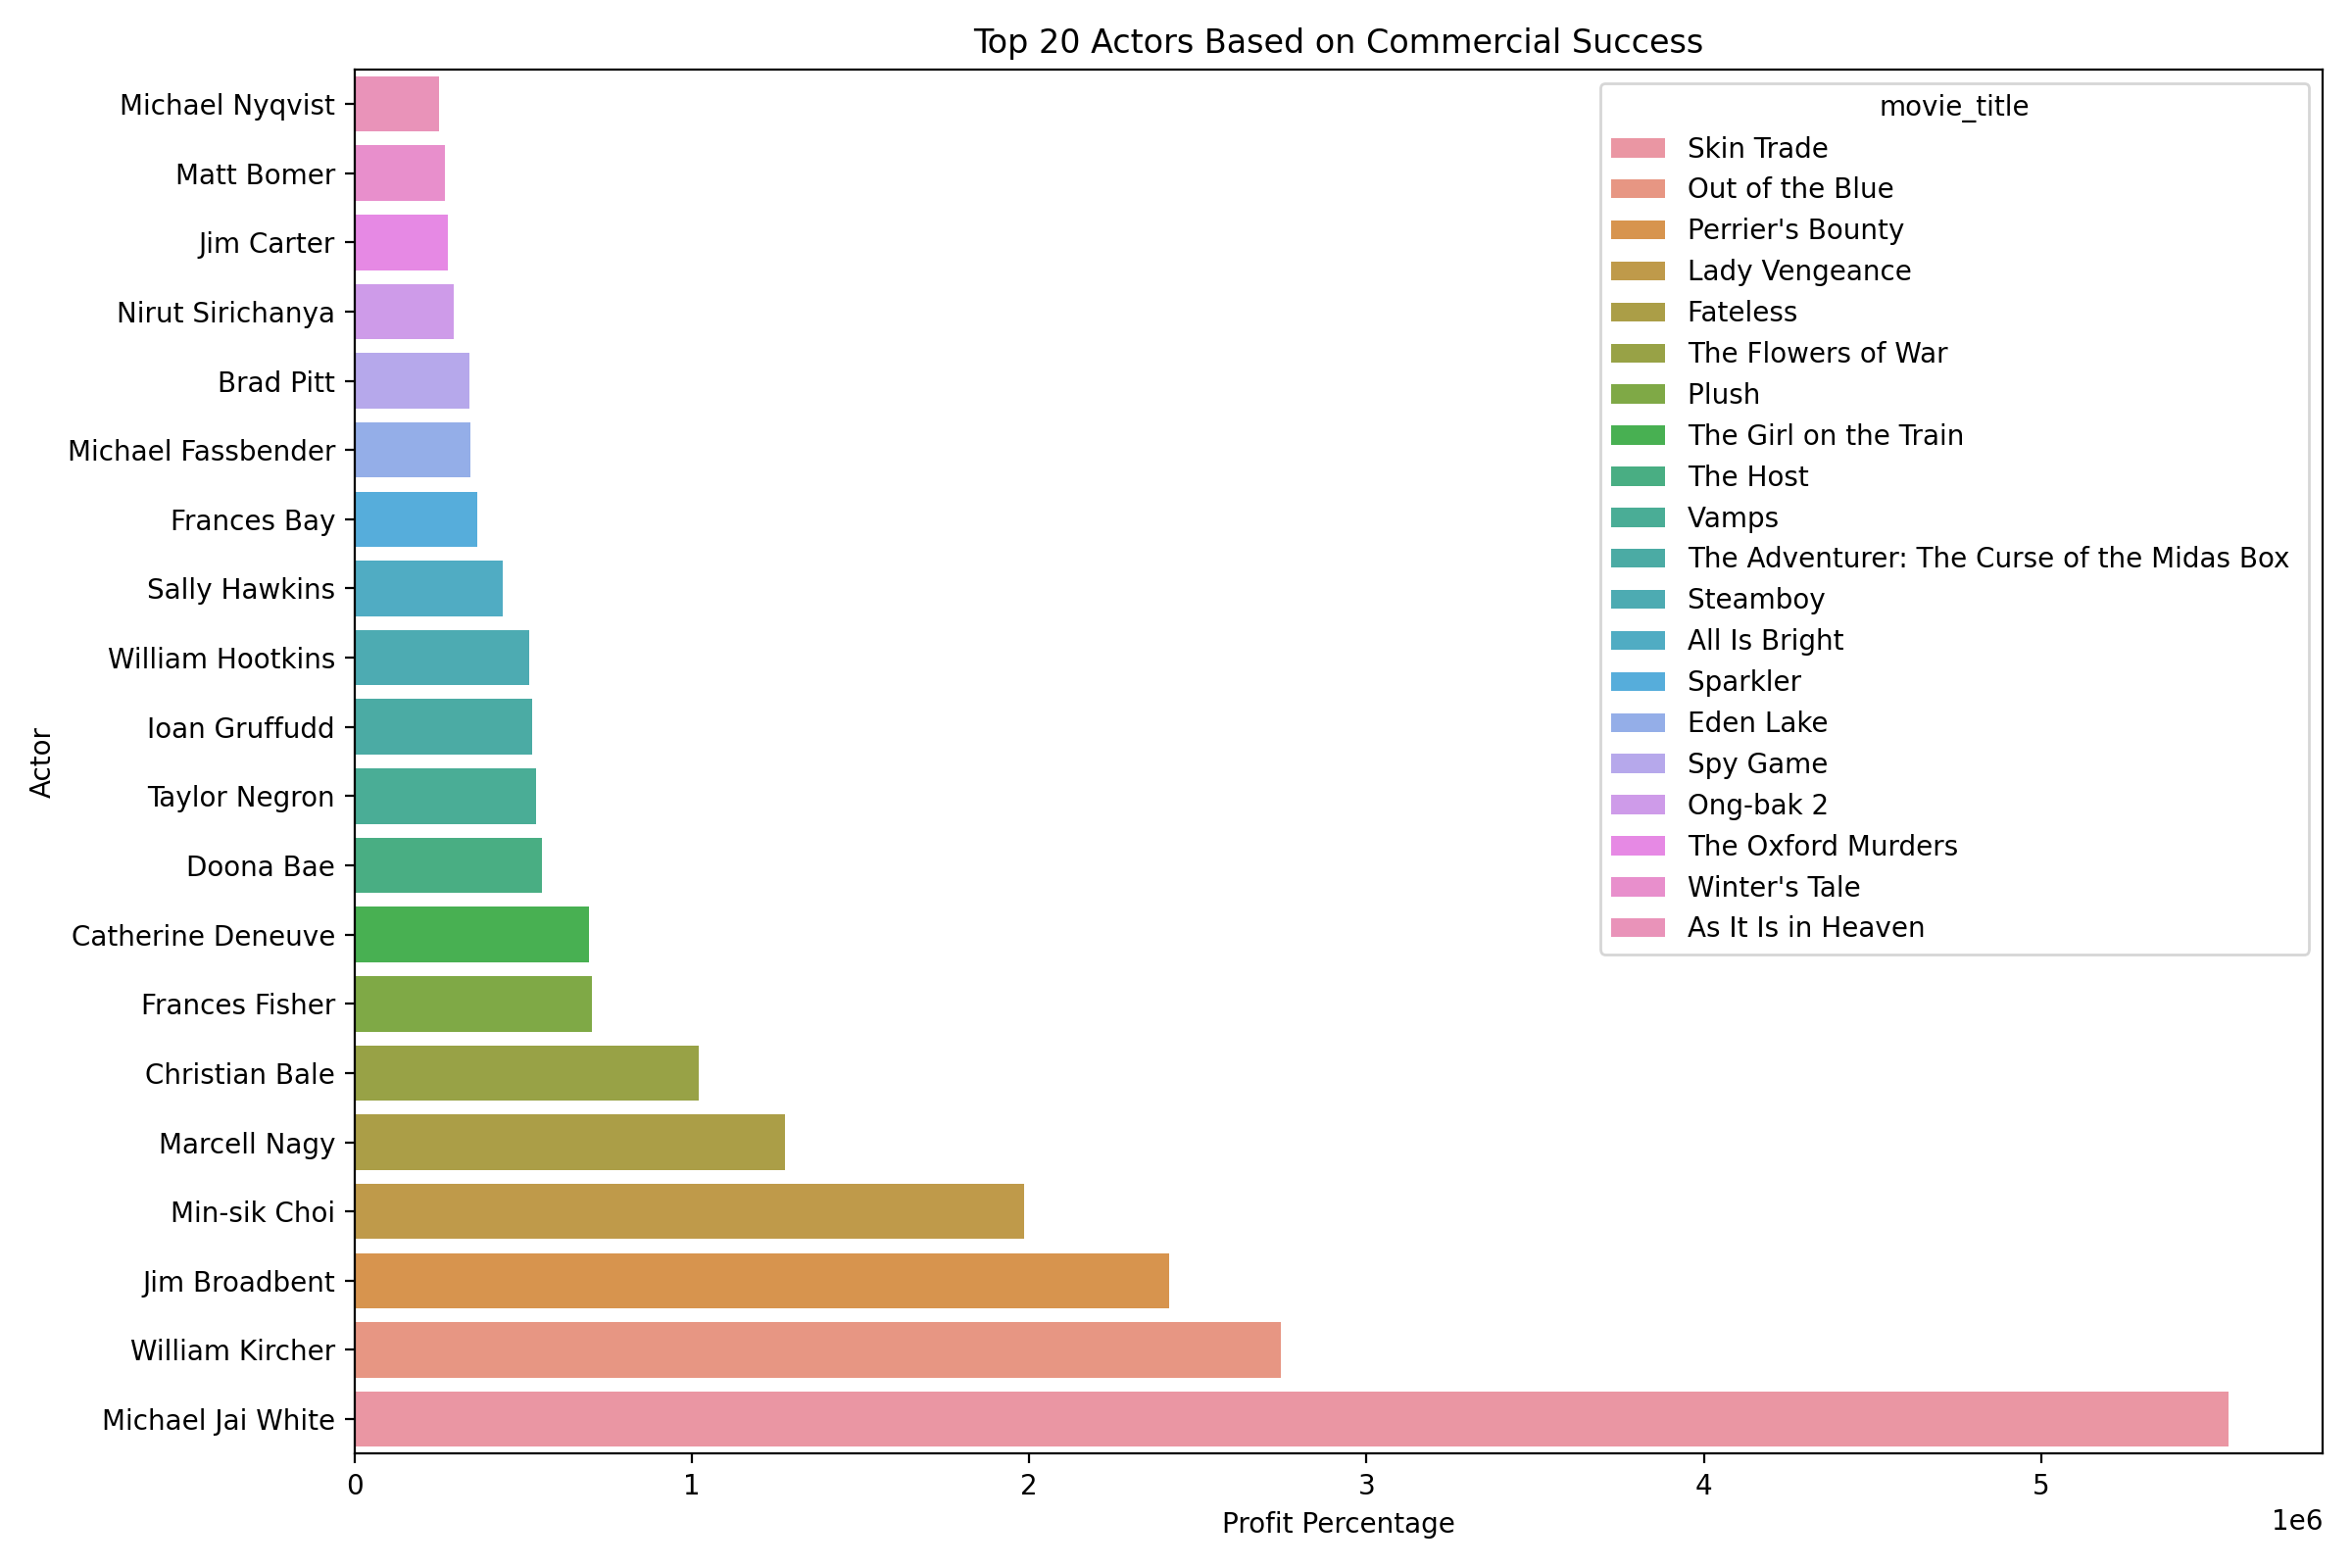

In [33]:
#Top 20 actors of movies based on the commerical success

plt.figure(figsize=(12, 8))

movie_IMDB_df = movie_IMDB_df.sort_values(by='Profit_Percentage', ascending=False)
movie_IMDB_df_new = movie_IMDB_df.head(20)
ax = sns.barplot(x='Profit_Percentage', y='actor_1_name', data=movie_IMDB_df_new, hue='movie_title', dodge=False)
ax.set_xlabel('Profit Percentage')
ax.set_ylabel('Actor')
ax.set_title('Top 20 Actors Based on Commercial Success')
ax.invert_yaxis()
plt.tight_layout()
plt.show()


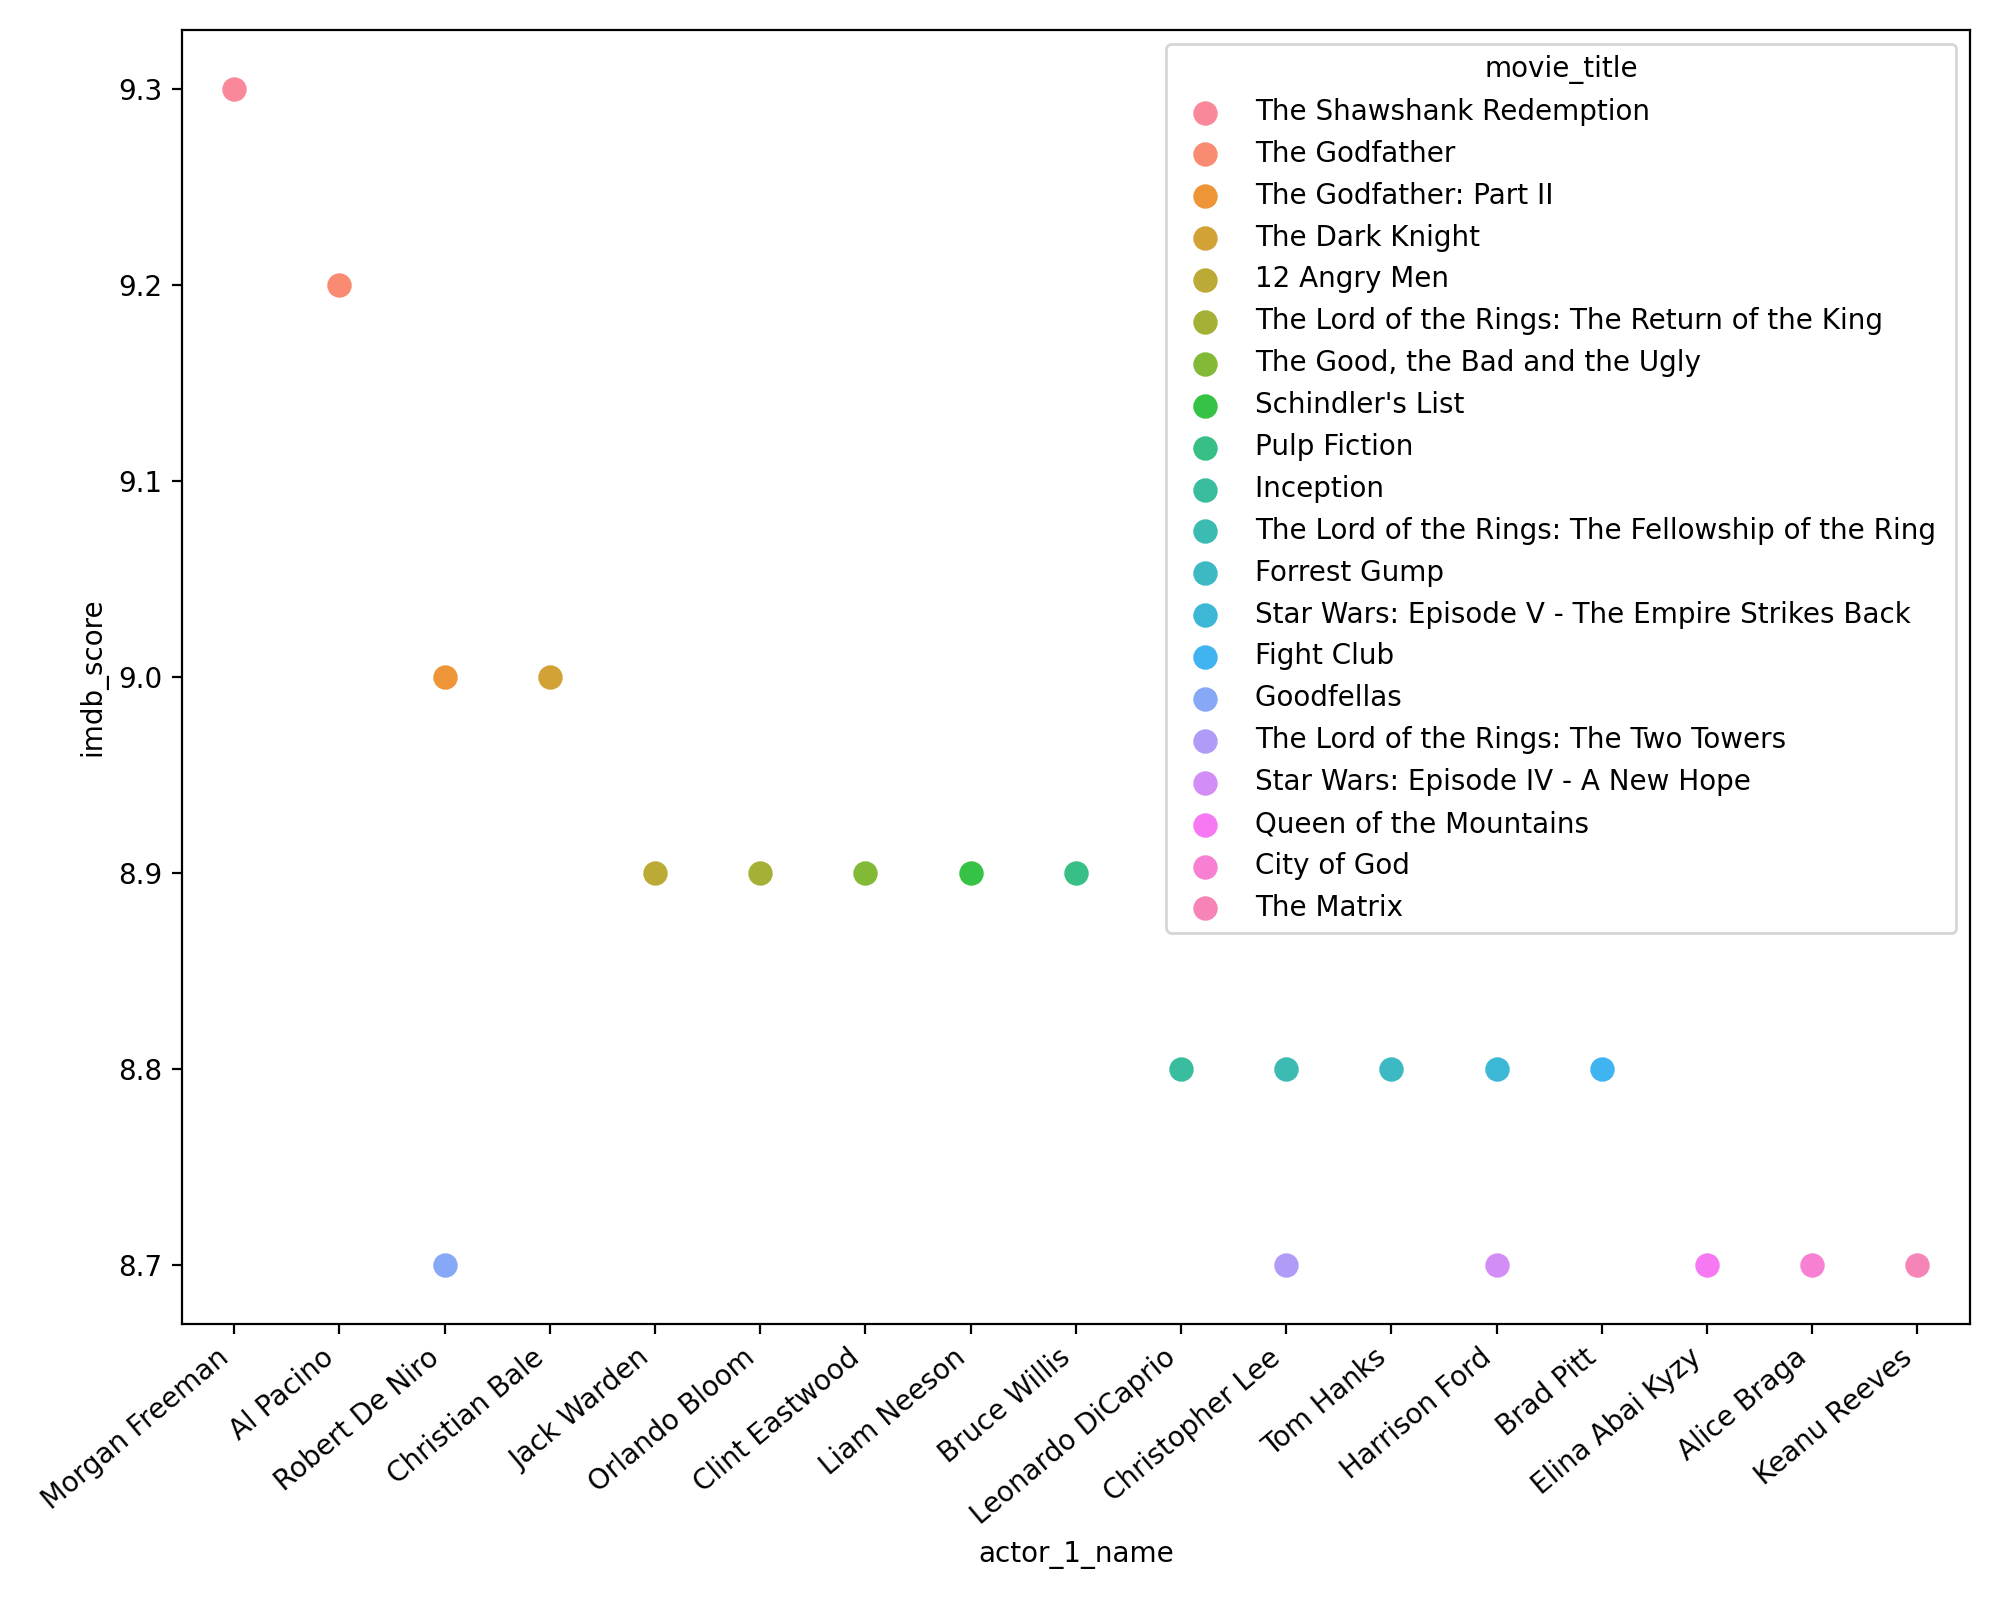

In [34]:
#Top 20 actors of movies based on the imdb rating of the movies 

plt.figure(figsize=(10, 8))
movie_IMDB_df = movie_IMDB_df.sort_values(by='imdb_score', ascending=False)
movie_IMDB_df_new = movie_IMDB_df.head(20)
ax = sns.pointplot(x='actor_1_name', y='imdb_score', data=movie_IMDB_df_new, hue='movie_title')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()



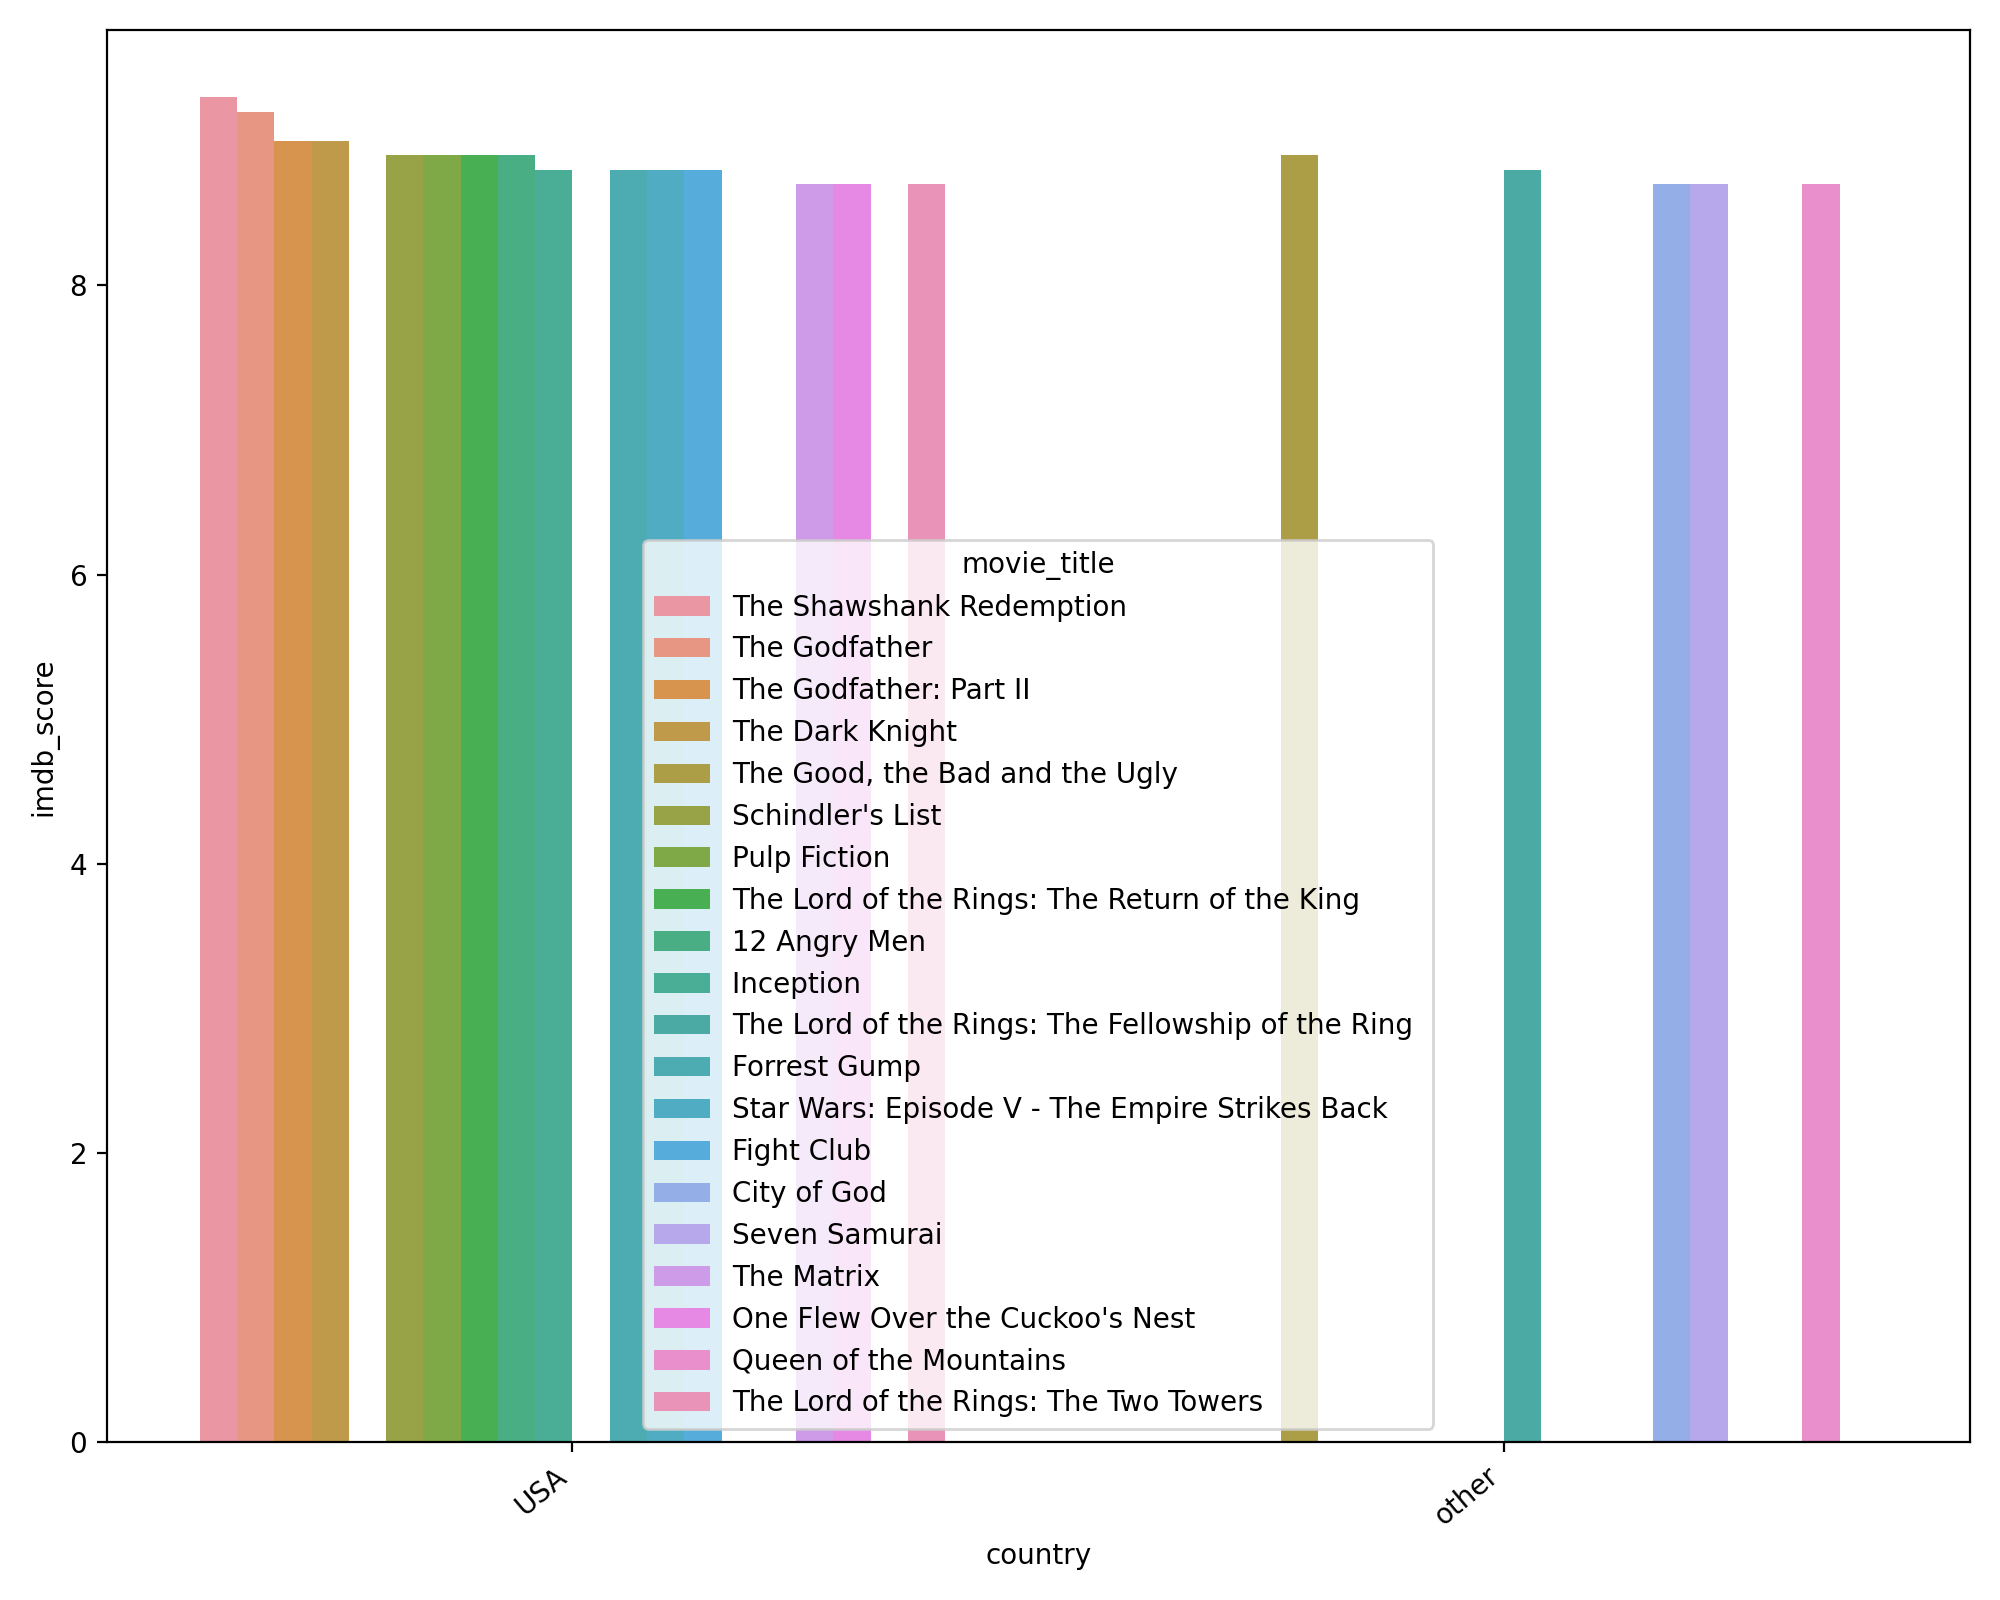

In [35]:
# Country of Top 20 movies based on imdb rating

plt.figure(figsize=(10, 8))
movie_IMDB_df = movie_IMDB_df.sort_values(by='imdb_score', ascending=False)
movie_IMDB_df_new = movie_IMDB_df.head(20)
ax = sns.barplot(x='country', y='imdb_score', data=movie_IMDB_df_new, hue='movie_title')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


**4.Data Preparation for the models - Dropping the columns with categorical values**

In [36]:
movie_IMDB_df.drop('director_name', axis=1, inplace=True)

In [37]:
movie_IMDB_df.drop('actor_1_name',axis=1,inplace=True)

In [38]:
movie_IMDB_df.drop('actor_2_name',axis=1,inplace=True)

In [39]:
movie_IMDB_df.drop('actor_3_name',axis=1,inplace=True)

In [40]:
movie_IMDB_df.drop('movie_title',axis=1,inplace=True)

In [41]:
movie_IMDB_df.drop('plot_keywords',axis=1,inplace=True)

In [42]:
movie_IMDB_df['genres'].value_counts()

Drama                                       209
Comedy                                      186
Comedy|Drama|Romance                        182
Comedy|Drama                                180
Comedy|Romance                              149
                                           ... 
Action|Adventure|Family|Fantasy|Romance       1
Biography|Documentary|Drama                   1
Comedy|Drama|Music|Musical|Romance            1
Biography|Comedy|Musical|Romance|Western      1
Action|Animation|Comedy|Family|Fantasy        1
Name: genres, Length: 875, dtype: int64

In [43]:
movie_IMDB_df.drop('genres',axis=1,inplace =True)

In [44]:
movie_IMDB_df.drop('Profit',axis=1,inplace=True)

In [45]:
movie_IMDB_df.drop('Profit_Percentage',axis=1,inplace=True)

C:\Users\rutuj\AppData\Local\Temp\ipykernel_28172\3521870685.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


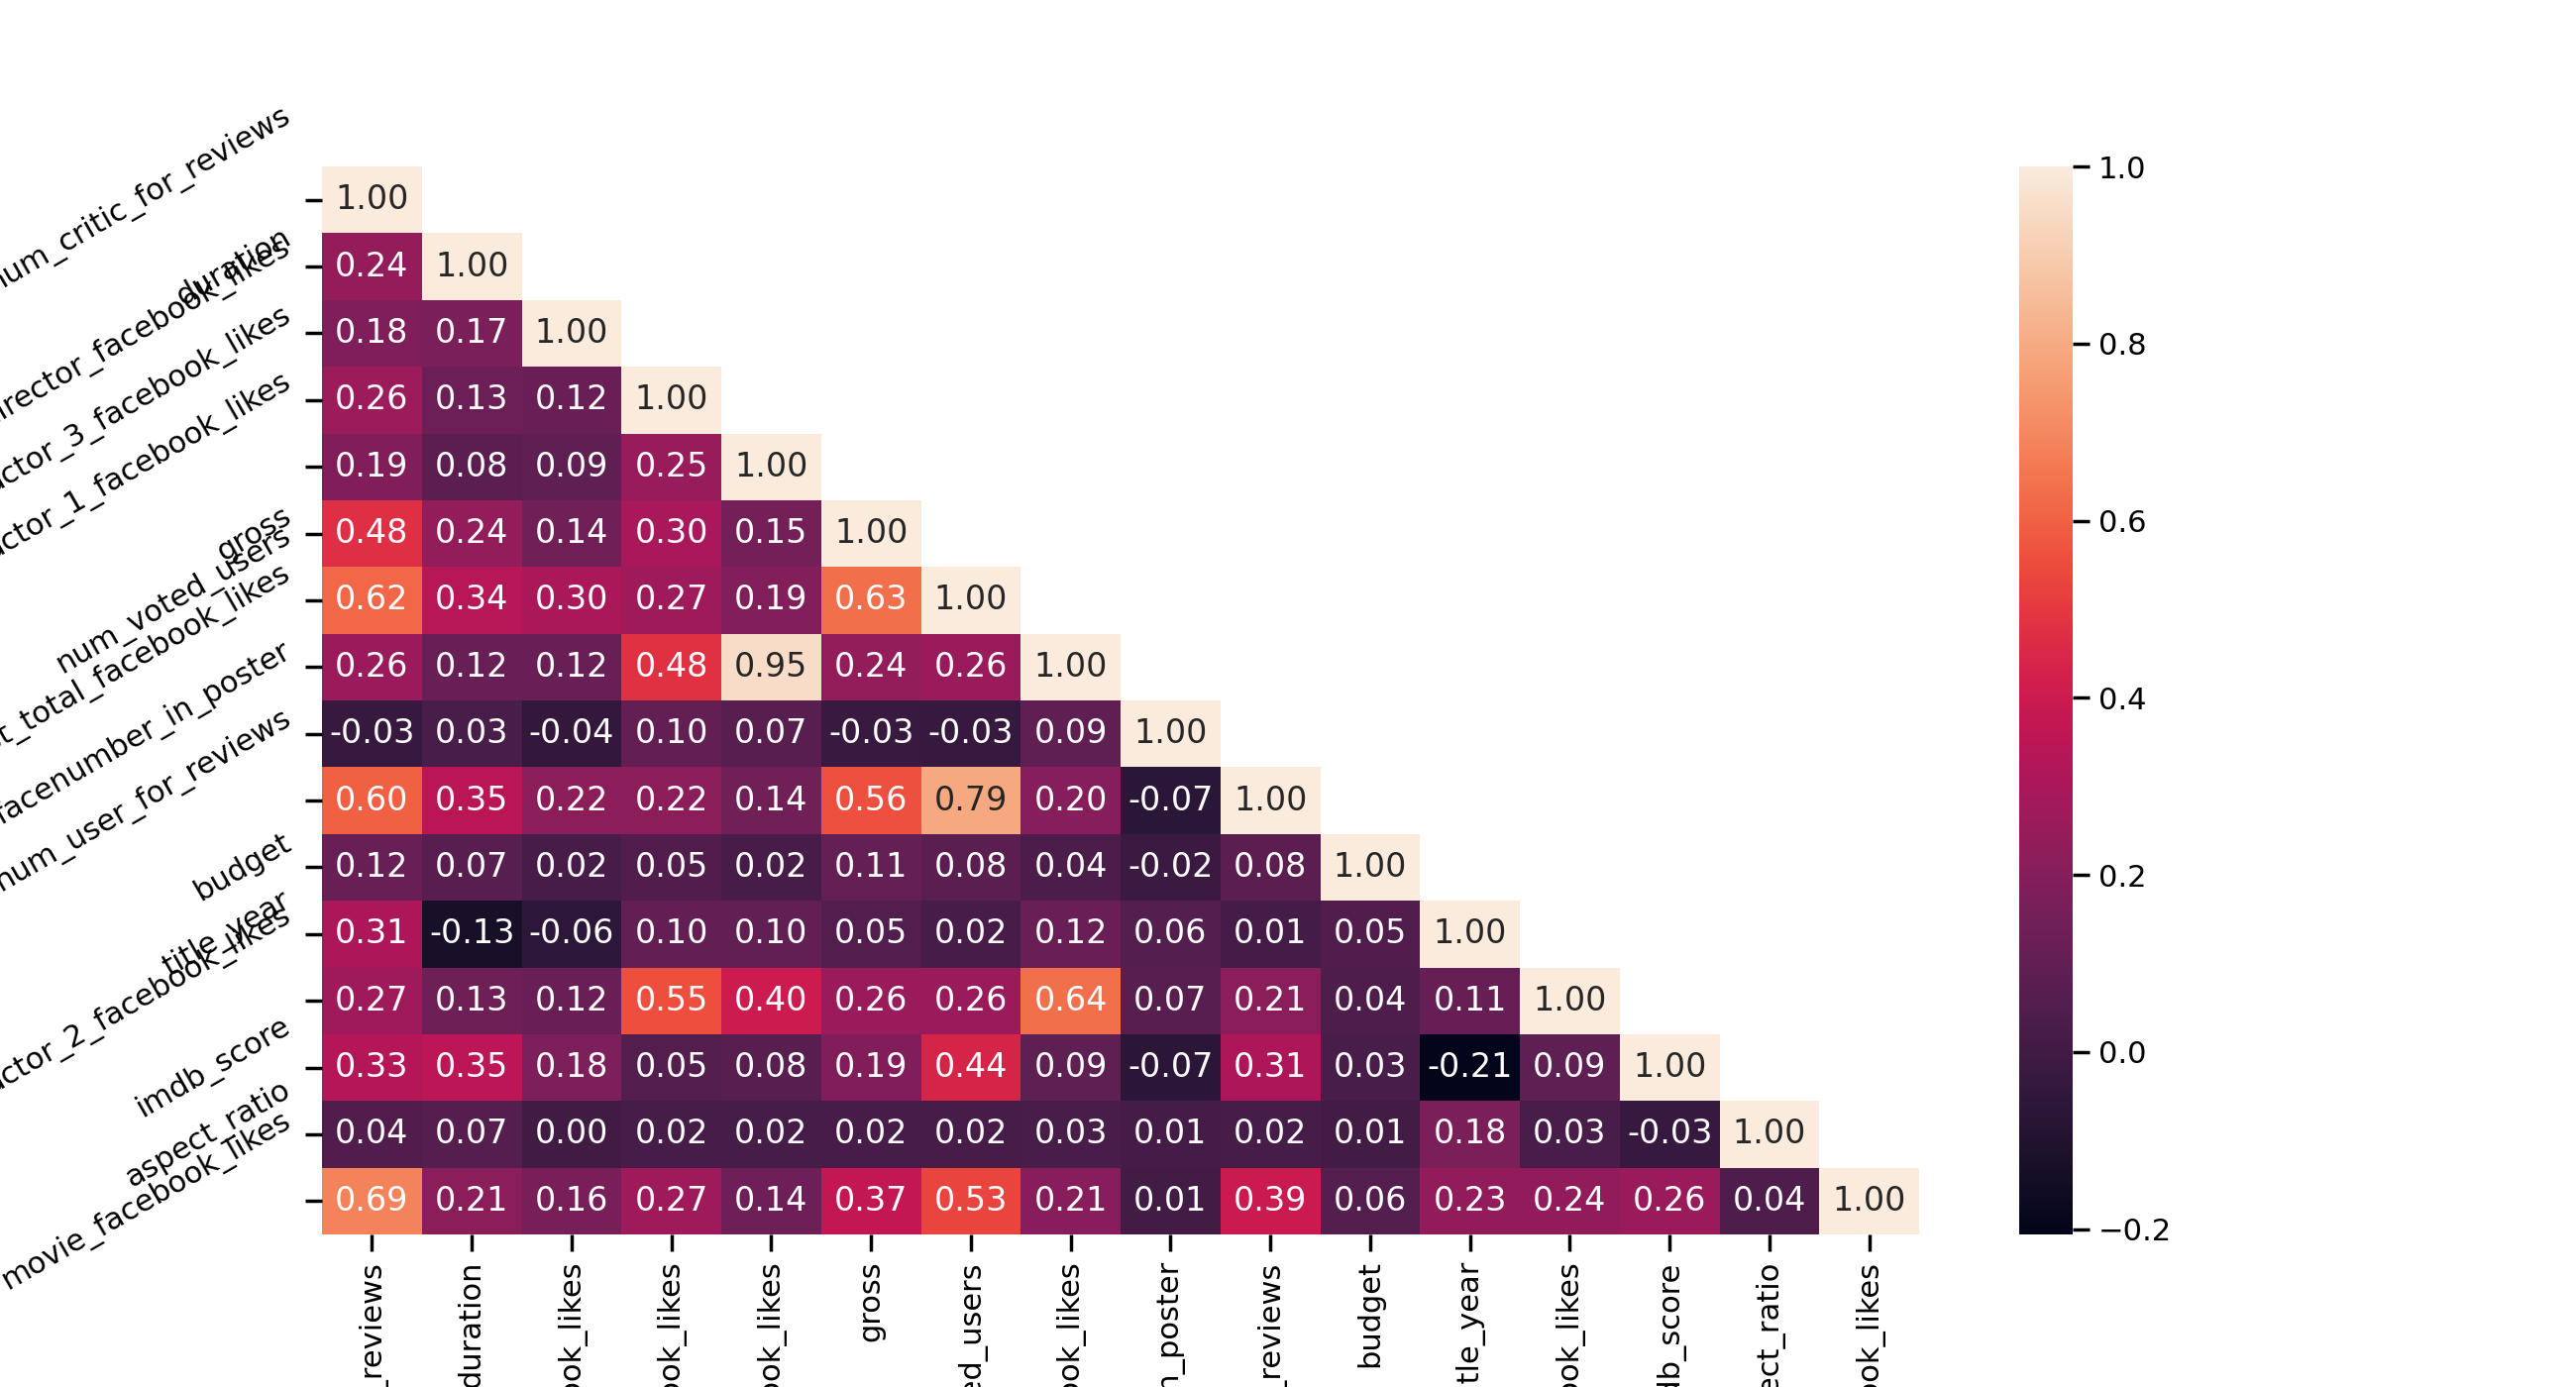

In [46]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = movie_IMDB_df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [47]:
#Adding the facebook likes of actor 2 and actor 3 together 
movie_IMDB_df['Other_actor_facebbok_likes']=movie_IMDB_df["actor_2_facebook_likes"] + movie_IMDB_df['actor_3_facebook_likes']



In [48]:
#Dropping the actor 2 and actor 3 facebook likes columns as they have been added together 

movie_IMDB_df.drop('actor_2_facebook_likes',axis=1,inplace=True)

In [49]:
movie_IMDB_df.drop('actor_3_facebook_likes',axis=1,inplace=True)

In [50]:
movie_IMDB_df.drop('cast_total_facebook_likes',axis=1,inplace=True)

In [51]:
#Ratio of the ratio of num_user_for_reviews and num_critic_for_reviews.

movie_IMDB_df['critic_review_ratio']=movie_IMDB_df['num_critic_for_reviews']/movie_IMDB_df['num_user_for_reviews']

In [52]:
#Dropping the num_critic_for_review

movie_IMDB_df.drop('num_critic_for_reviews',axis=1,inplace=True)
movie_IMDB_df.drop('num_user_for_reviews',axis=1,inplace=True)

C:\Users\rutuj\AppData\Local\Temp\ipykernel_28172\2220497683.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


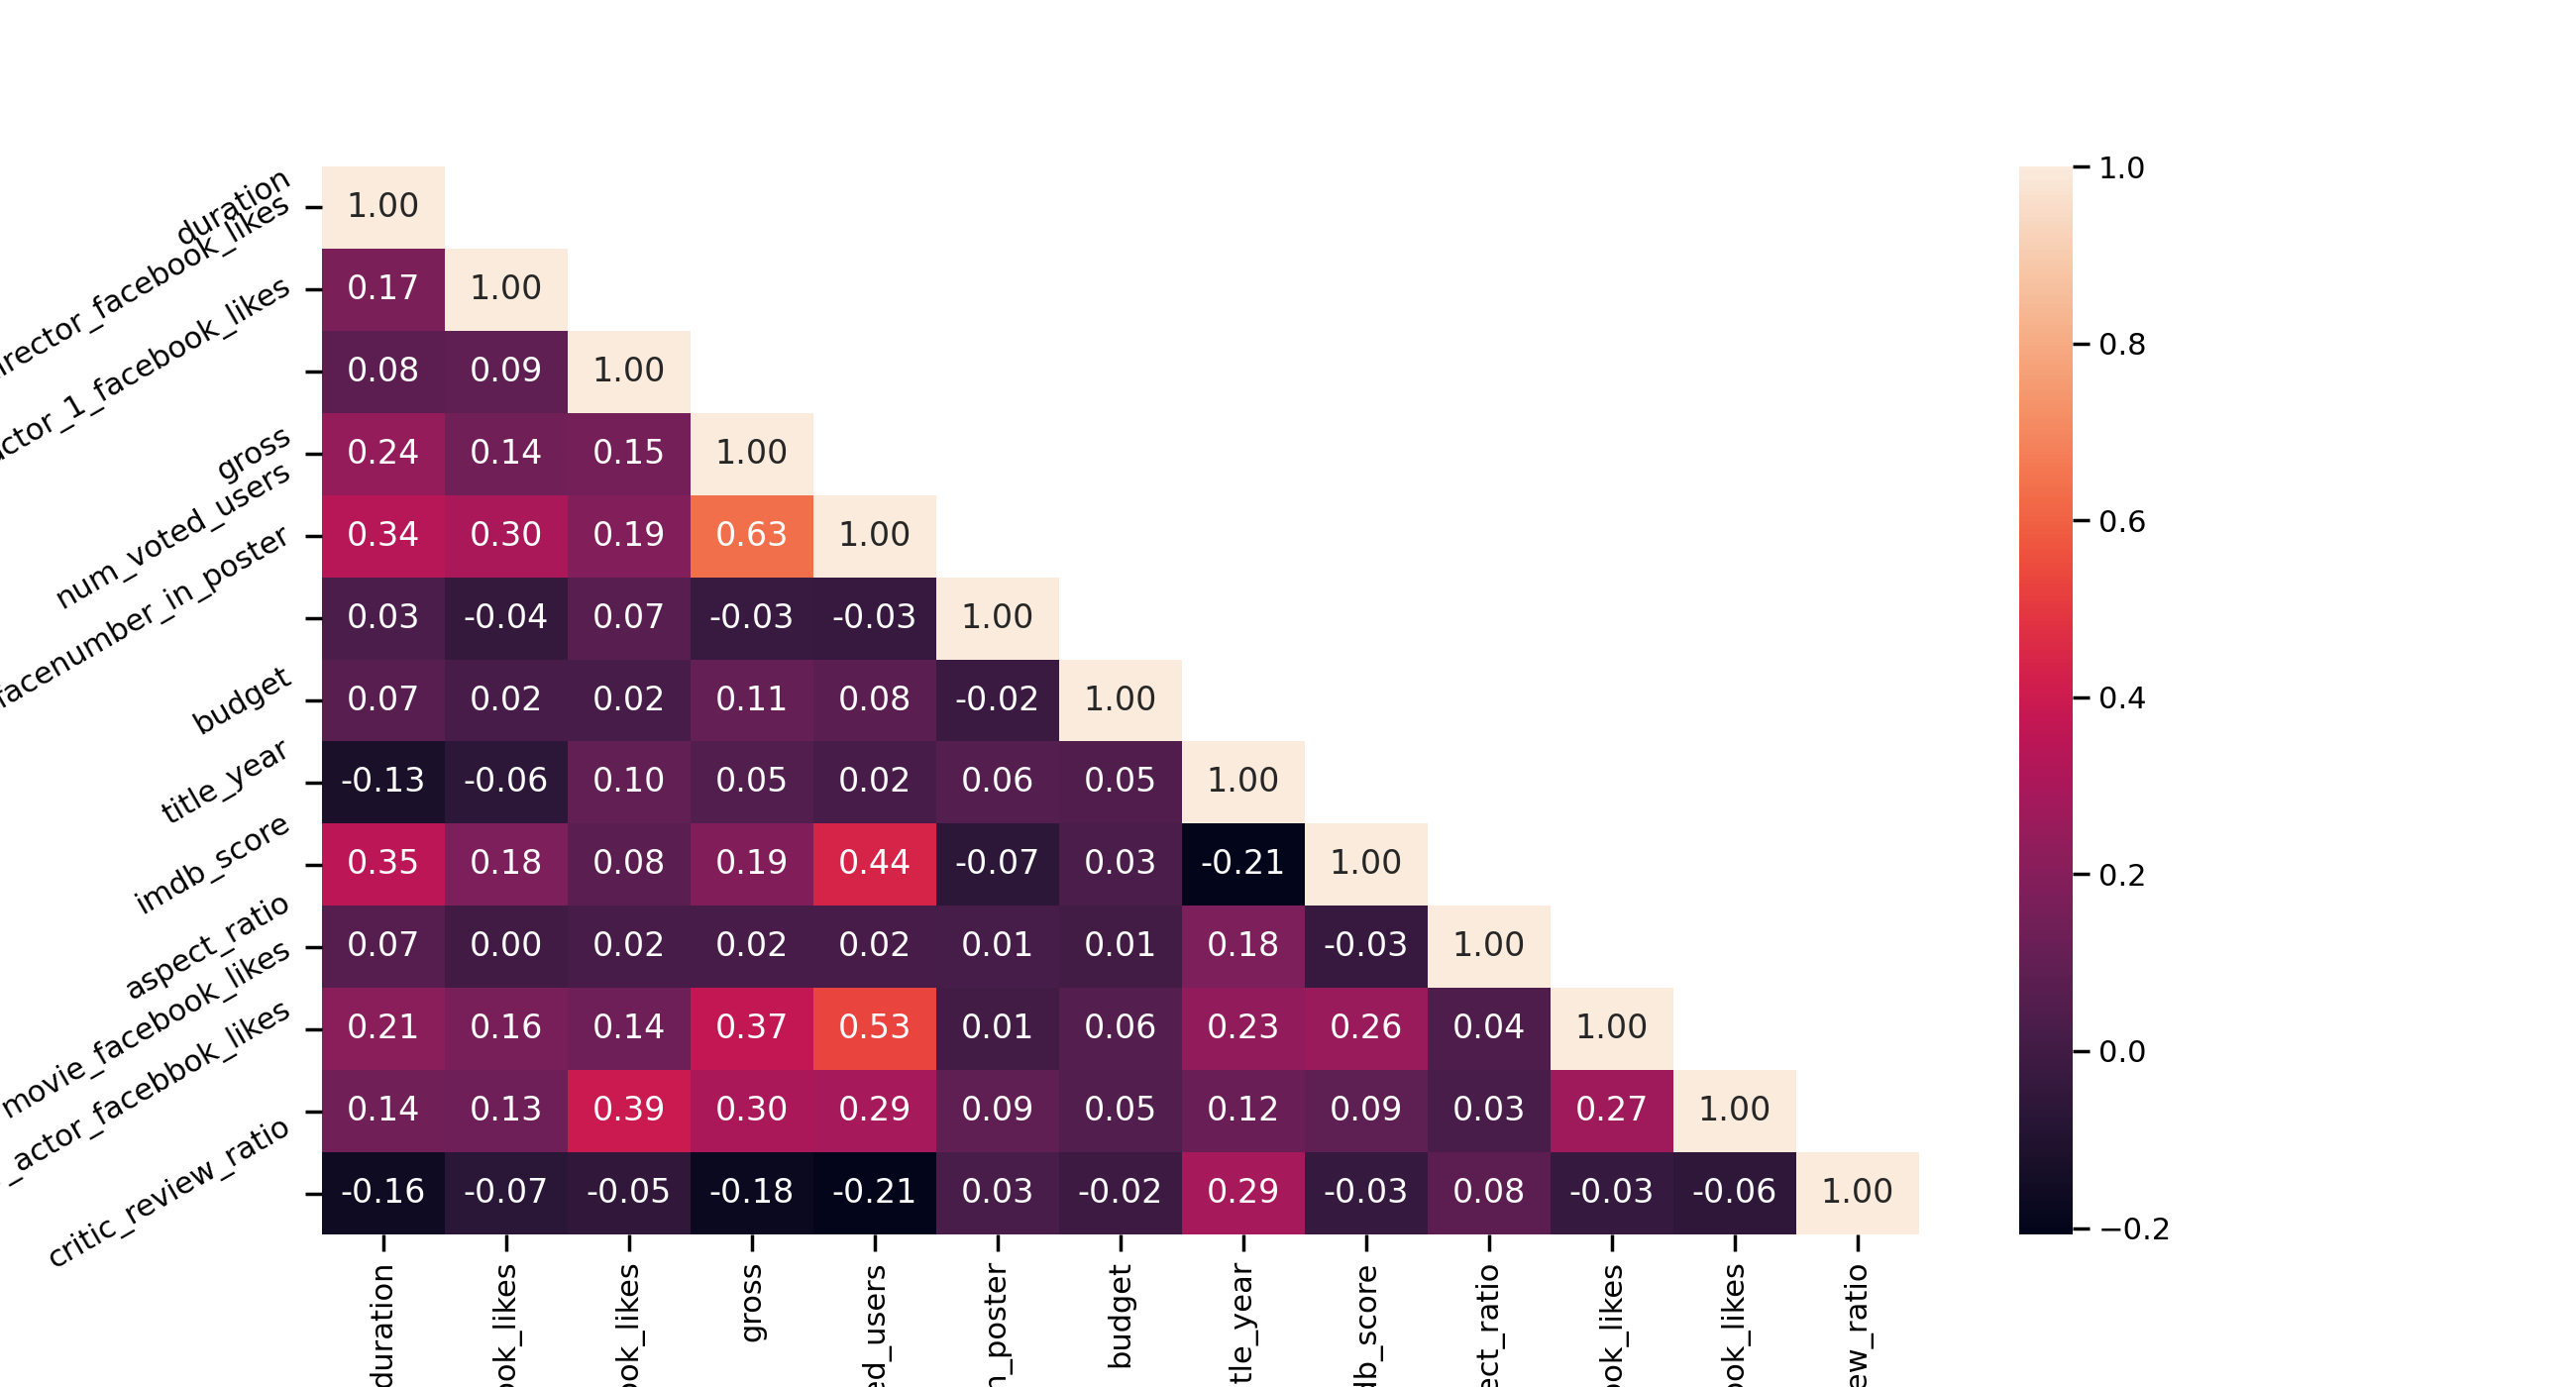

In [53]:
# New Correlation matrix shown in the figure 

import matplotlib.pyplot as plt
import seaborn as sns
corr = movie_IMDB_df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Now we can see none of the attributes are not much correlated to each other.All are below 0.7 

In [54]:
# We need to categorize the imdb values in the range of 0-4,4-6,6-8 and 8-10 to mark them as the bad,average,good and excellent movies respectively

movie_IMDB_df["imdb_binned_score"]=pd.cut(movie_IMDB_df['imdb_score'], bins=[0,4,6,8,10], right=True, labels=False)+1

In [55]:
#Dropping the imdb_score column as it is being replaced with the imdb_binned_score values 
movie_IMDB_df.drop('imdb_score',axis=1,inplace=True)

In [56]:
movie_IMDB_df.head(5)

,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,country,content_rating,budget,title_year,aspect_ratio,movie_facebook_likes,Other_actor_facebbok_likes,critic_review_ratio,imdb_binned_score
1937,142.0,0.0,11000.0,28341469.0,1689764,0.0,USA,R,25000000.0,1994.0,1.85,108000,1206.0,0.048021,4
3466,175.0,0.0,14000.0,134821952.0,1155770,1.0,USA,R,6000000.0,1972.0,1.85,43000,13000.0,0.092940,4
2837,220.0,0.0,22000.0,57300000.0,790926,1.0,USA,R,13000000.0,1974.0,1.85,14000,17000.0,0.229231,4
66,152.0,22000.0,23000.0,533316061.0,1676169,0.0,USA,PG-13,185000000.0,2008.0,2.35,37000,24000.0,0.138204,4
4498,142.0,0.0,16000.0,6100000.0,503509,3.0,other,Approved,1200000.0,1966.0,2.35,20000,58.0,0.232051,4


**5. Handling the categorical data**

In [57]:
movie_IMDB_df = pd.get_dummies(data = movie_IMDB_df, columns = ['country'] , prefix = ['country'] , drop_first = True)
movie_IMDB_df = pd.get_dummies(data = movie_IMDB_df, columns = ['content_rating'] , prefix = ['content_rating'] , drop_first = True)

In [58]:
movie_IMDB_df.columns

Index(['duration', 'director_facebook_likes', 'actor_1_facebook_likes',
       'gross', 'num_voted_users', 'facenumber_in_poster', 'budget',
       'title_year', 'aspect_ratio', 'movie_facebook_likes',
       'Other_actor_facebbok_likes', 'critic_review_ratio',
       'imdb_binned_score', 'country_USA', 'country_other', 'content_rating_G',
       'content_rating_GP', 'content_rating_M', 'content_rating_NC-17',
       'content_rating_Not Rated', 'content_rating_PG', 'content_rating_PG-13',
       'content_rating_Passed', 'content_rating_R', 'content_rating_TV-14',
       'content_rating_TV-G', 'content_rating_TV-PG', 'content_rating_Unrated',
       'content_rating_X'],
      dtype='object')

**6. Splitting the data into training and test data**

In [59]:
#Splitting the data into training and test data
X=pd.DataFrame(columns=['duration','director_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','facenumber_in_poster','budget','title_year','aspect_ratio','movie_facebook_likes','Other_actor_facebbok_likes','critic_review_ratio','country_USA','country_other','content_rating_G','content_rating_GP','content_rating_M','content_rating_NC-17','content_rating_Not Rated','content_rating_PG','content_rating_PG-13','content_rating_Passed','content_rating_R','content_rating_TV-14','content_rating_TV-G','content_rating_TV-PG','content_rating_Unrated','content_rating_X'],data=movie_IMDB_df)
y=pd.DataFrame(columns=['imdb_binned_score'],data=movie_IMDB_df)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=100)

**7.Feature scaling**

In [60]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

**8. Classification Model Selection**

**8.1 SVC**

In [61]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1]
}

svc = SVC()
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)


grid_search.fit(X_train, np.ravel(y_train, order='C'))
best_svc = grid_search.best_estimator_
svcpred = best_svc.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, svcpred)
print(cnf_matrix)
print("Accuracy for SVC:", metrics.accuracy_score(y_test, svcpred))


Fitting 2 folds for each of 144 candidates, totalling 288 fits
[[  0  34  12   0]
 [  0 168 210   0]
 [  0 104 818   2]
 [  0   1  28  32]]
Accuracy for SVC: 0.7224982256919801


**8.7 Random Forest**

In [62]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create a Random Forest classifier
rfc = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)


grid_search.fit(X_train, np.ravel(y_train, order='C'))
best_rfc = grid_search.best_estimator_

rfcpred = best_rfc.predict(X_test)


cnf_matrix = metrics.confusion_matrix(y_test, rfcpred)
print(cnf_matrix)
print("Accuracy for Random Forest:", metrics.accuracy_score(y_test, rfcpred))


Fitting 2 folds for each of 162 candidates, totalling 324 fits
[[  0  26  20   0]
 [  0 179 199   0]
 [  0  76 845   3]
 [  0   0  32  29]]
Accuracy for Random Forest: 0.7473385379701917


**8.9 Gradient Boosting**



In [63]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Create a Gradient Boosting classifier
gbcl = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator=gbcl, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)


grid_search.fit(X_train, np.ravel(y_train, order='C'))
best_gbcl = grid_search.best_estimator_

test_pred = best_gbcl.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, test_pred)
print(cnf_matrix)
print("Accuracy for Gradient Boosting:", metrics.accuracy_score(y_test, test_pred))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[[  2  34  10   0]
 [  4 204 170   0]
 [  2 111 800  11]
 [  0   1  26  34]]
Accuracy for Gradient Boosting: 0.7381121362668559


**Model comparison**

In [64]:
#Classification Report
from sklearn.metrics import classification_report

print('SVC Reports\n',classification_report(y_test, svcpred))
print('Random Forests Reports\n',classification_report(y_test, rfcpred))
print('Gradient Boosting',classification_report(y_test, test_pred))

SVC Reports
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        46
           2       0.55      0.44      0.49       378
           3       0.77      0.89      0.82       924
           4       0.94      0.52      0.67        61

    accuracy                           0.72      1409
   macro avg       0.56      0.46      0.50      1409
weighted avg       0.69      0.72      0.70      1409

Random Forests Reports
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        46
           2       0.64      0.47      0.54       378
           3       0.77      0.91      0.84       924
           4       0.91      0.48      0.62        61

    accuracy                           0.75      1409
   macro avg       0.58      0.47      0.50      1409
weighted avg       0.72      0.75      0.72      1409

Gradient Boosting               precision    recall  f1-score   support

           1       0

C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

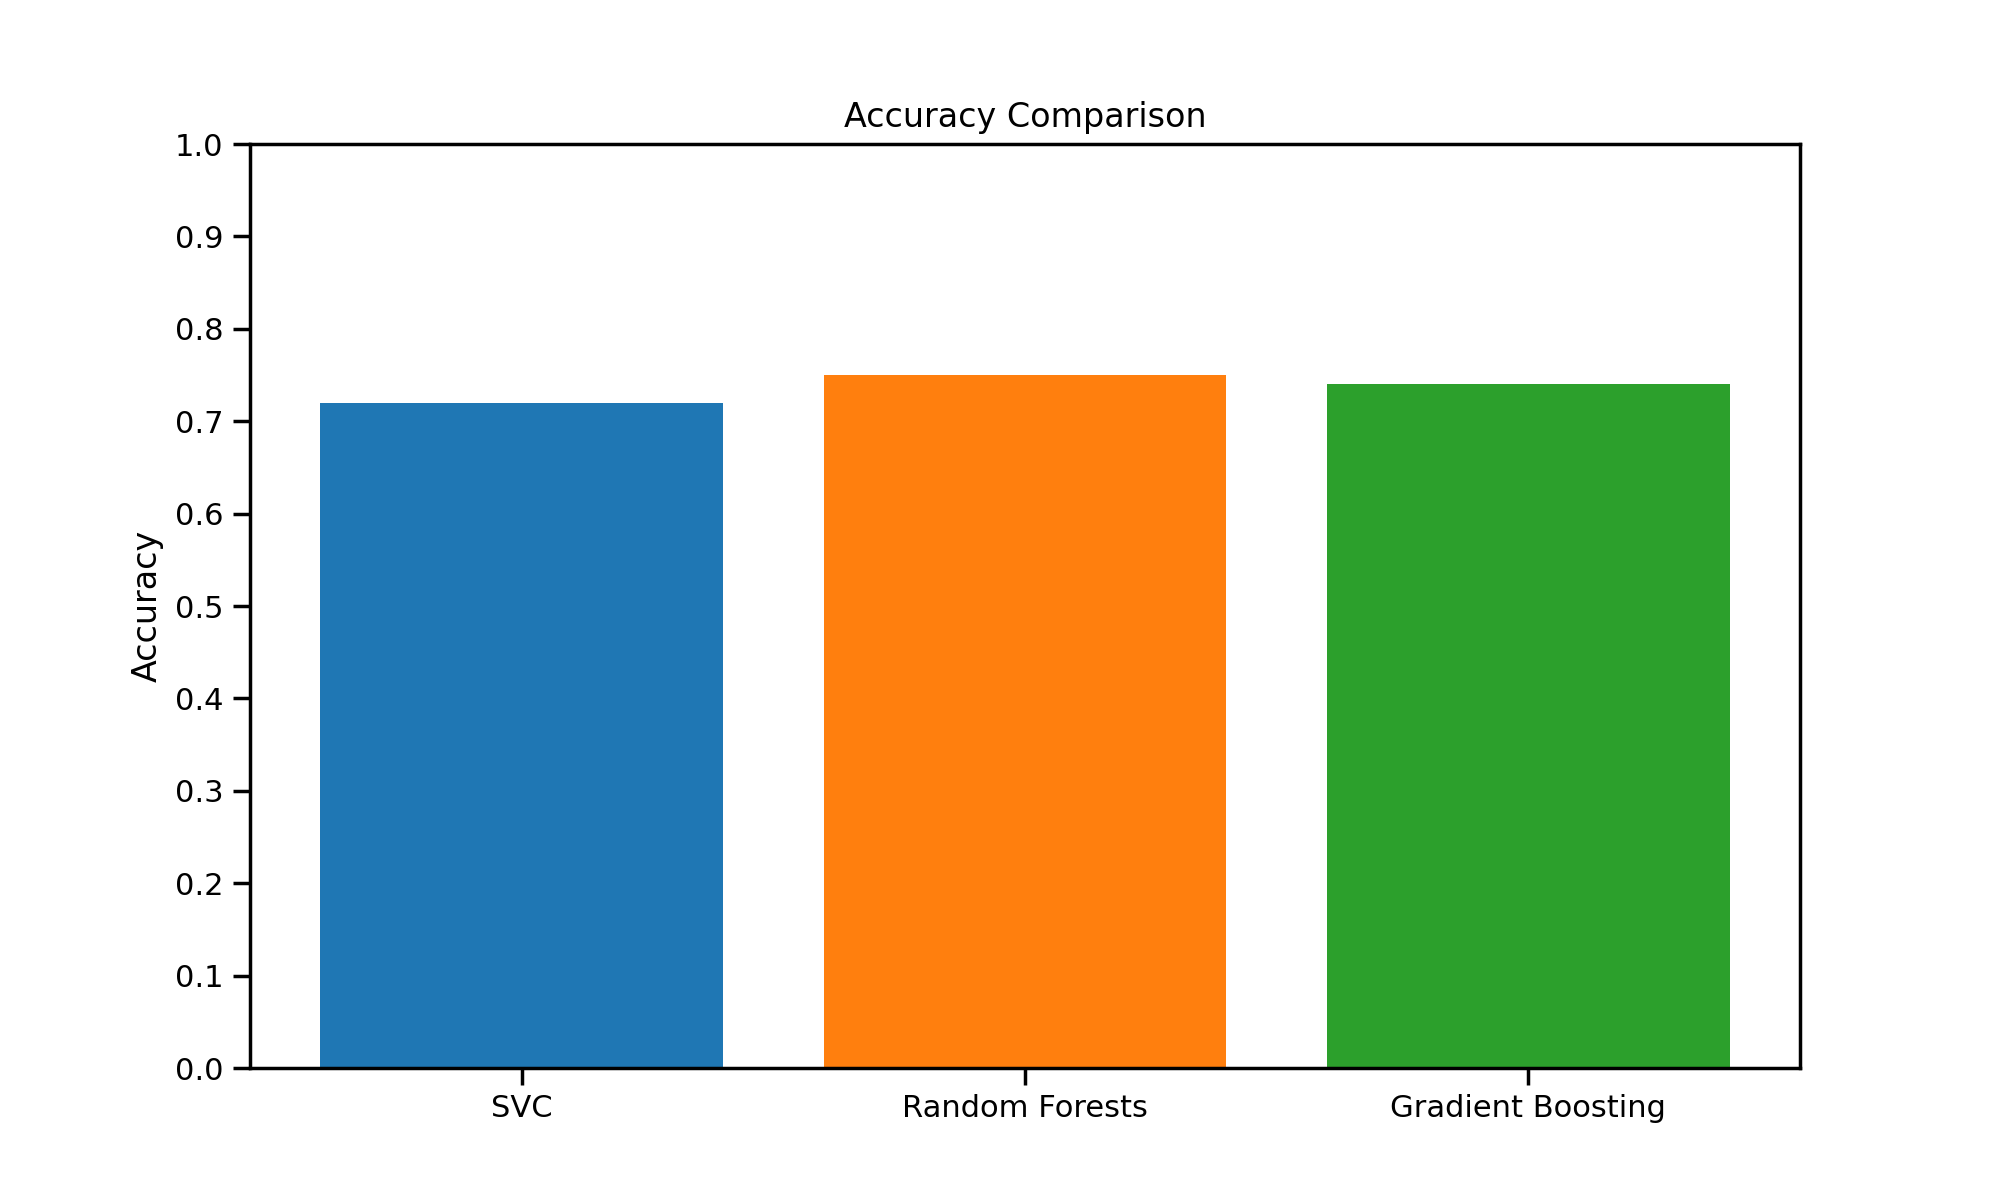

In [65]:
#Accuracy Comparison
import matplotlib.pyplot as plt

# Define the accuracy scores for each model
svc_accuracy = 0.72  
rfc_accuracy = 0.75  
gbcl_accuracy = 0.74 

# Create a new plot
plt.figure(figsize=(10, 6))

model_names = ['SVC', 'Random Forests', 'Gradient Boosting']
accuracies = [svc_accuracy, rfc_accuracy, gbcl_accuracy]


for model_name, accuracy in zip(model_names, accuracies):
    plt.bar(model_name, accuracy)

plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.yticks([i / 10 for i in range(11)])

# Display the plot
plt.show()


In [66]:
#Plotting Classification Reports
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


svc_report = classification_report(y_test, svcpred, output_dict=True)
rfc_report = classification_report(y_test, rfcpred, output_dict=True)
gbcl_report = classification_report(y_test, test_pred, output_dict=True)


reports = {
    'SVC': svc_report,
    'Random Forests': rfc_report,
    'Gradient Boosting': gbcl_report
}

model_names = ['SVC', 'Random Forests', 'Gradient Boosting']
metric_names = ['precision', 'recall', 'f1-score']

C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

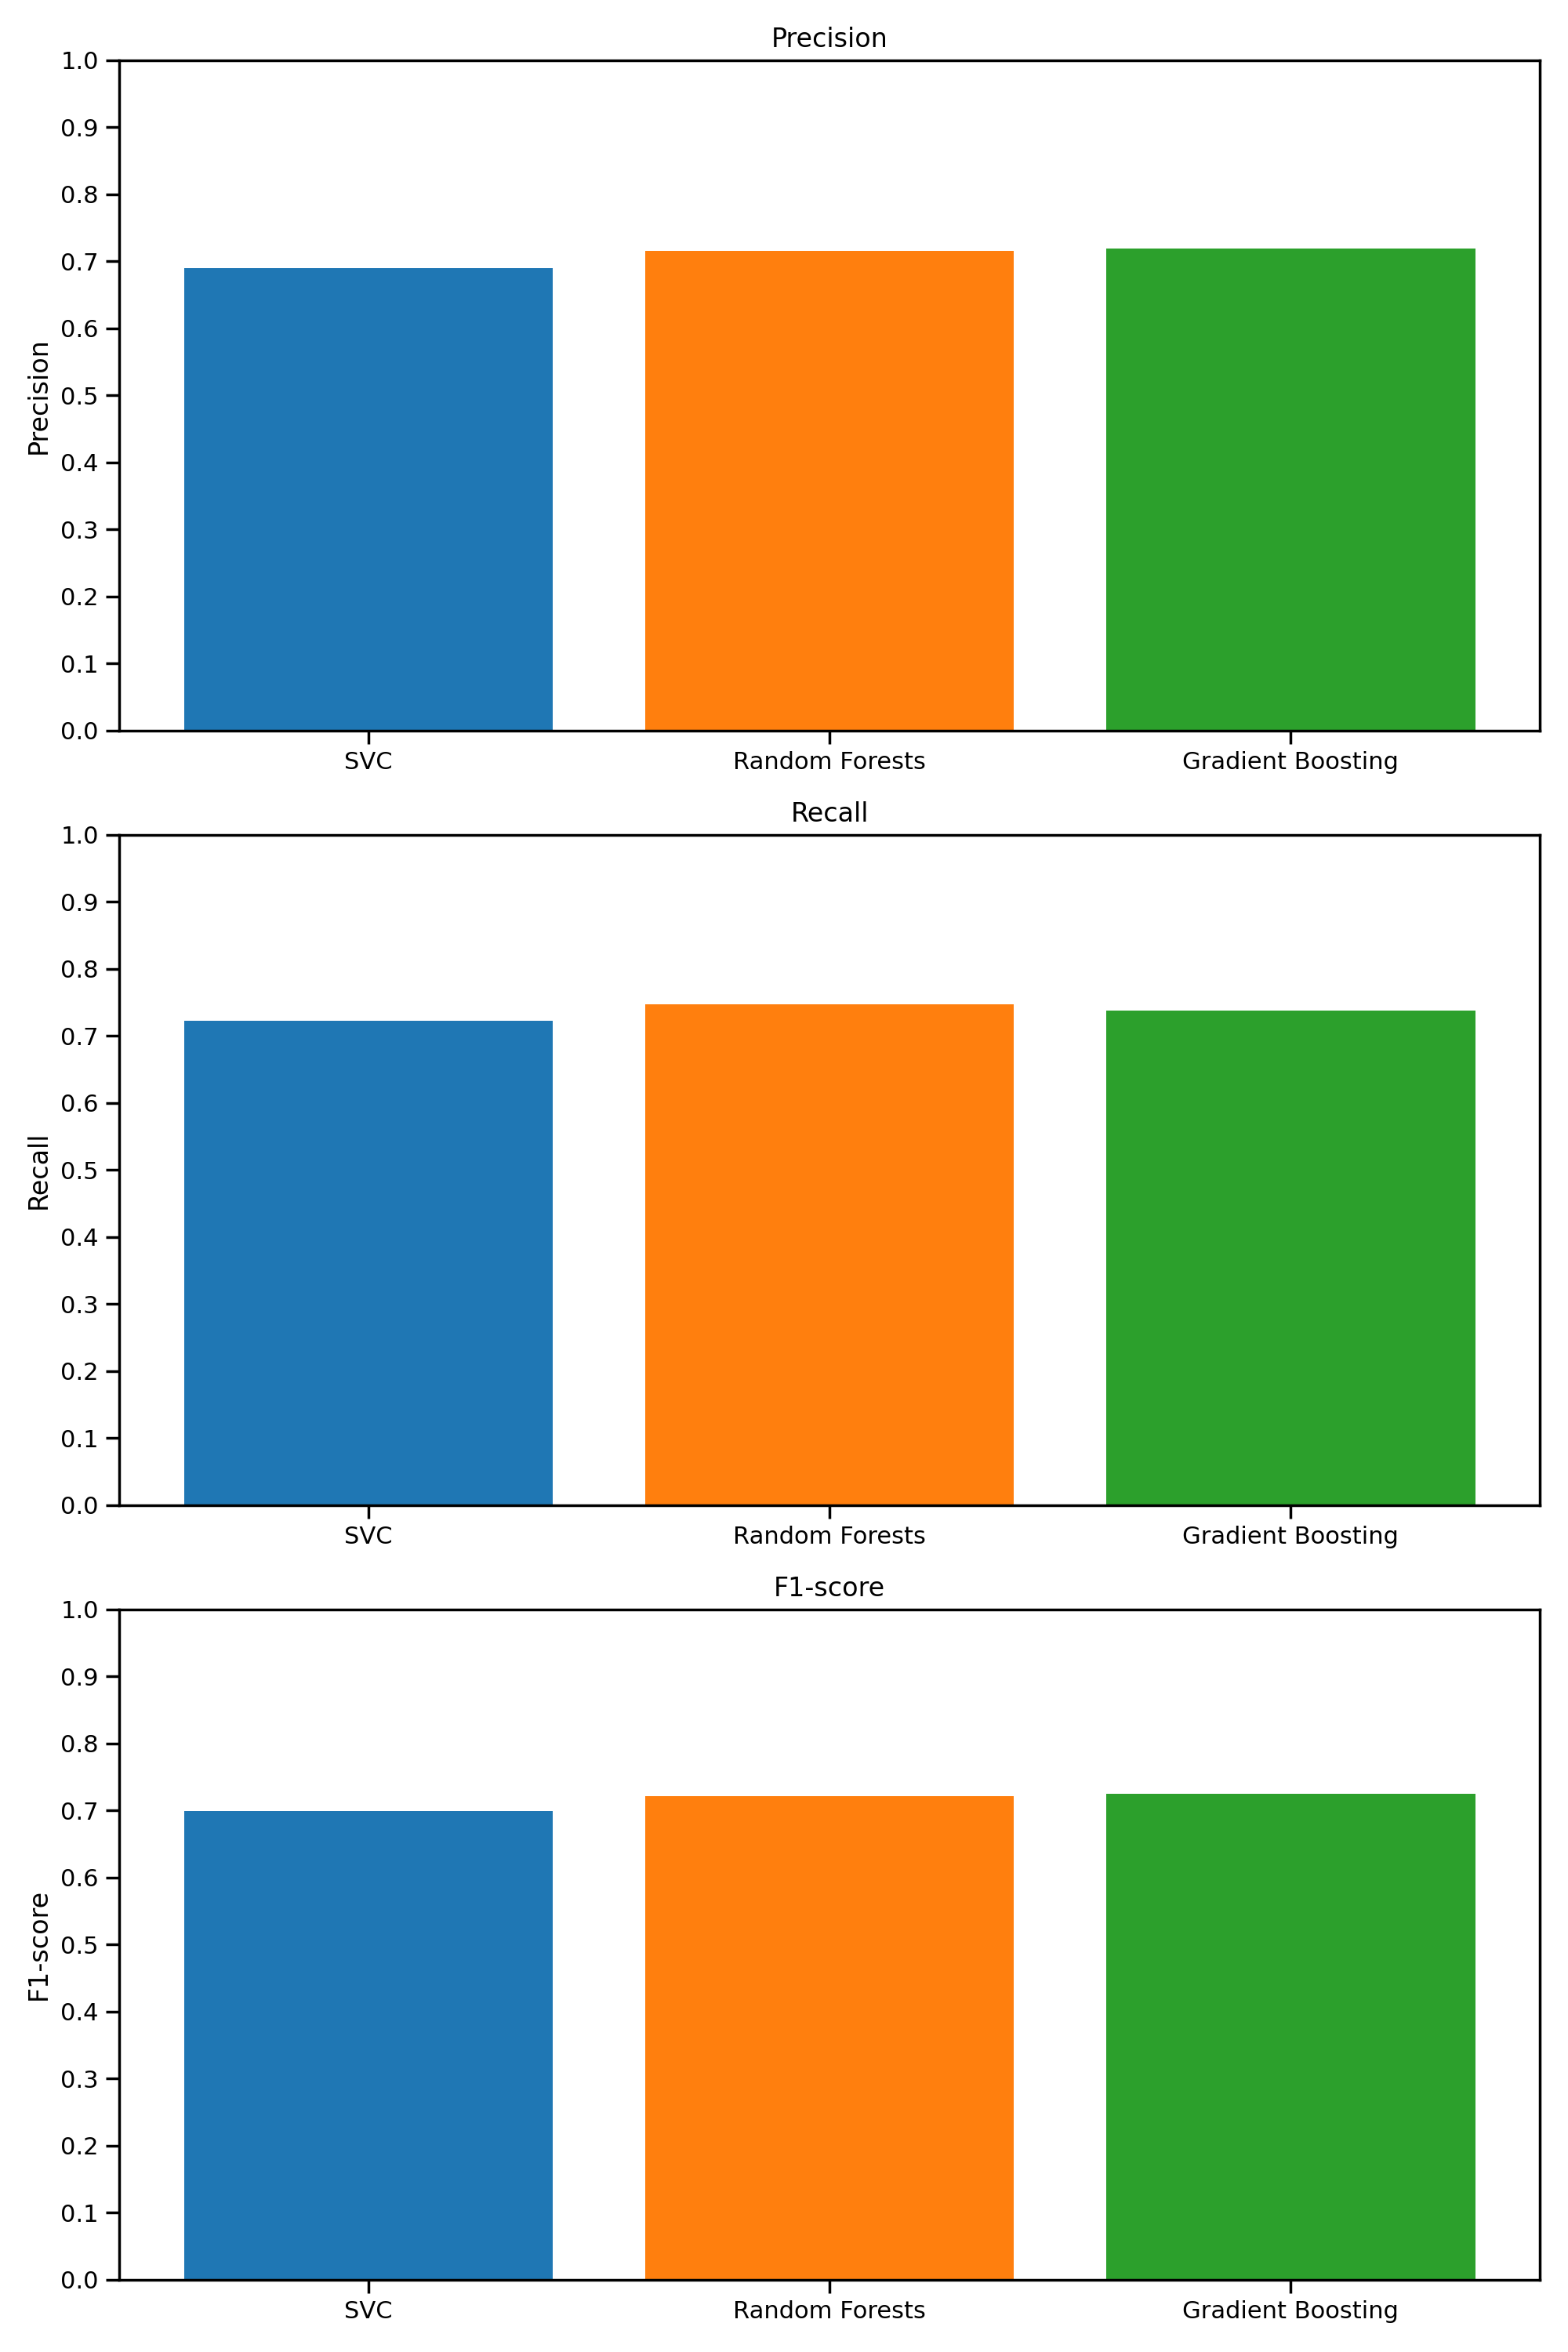

In [67]:
fig, axes = plt.subplots(len(metric_names), 1, figsize=(10, 15))

for i, metric_name in enumerate(metric_names):
    ax = axes[i]
    ax.set_title(metric_name.capitalize())
    
    for model_name in model_names:
        score = reports[model_name]['weighted avg'][metric_name]
        ax.bar(model_name, score)

    ax.set_ylabel(metric_name.capitalize())
    ax.set_ylim([0, 1])
    ax.set_yticks([i / 10 for i in range(11)])
    
plt.tight_layout()
plt.show()